In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Loan_Default.csv')

Missing values before:
 loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
property_value               15098
income                        9150
age                            200
submission_of_application      200
LTV                          15098
dtir1                        24121
dtype: int64


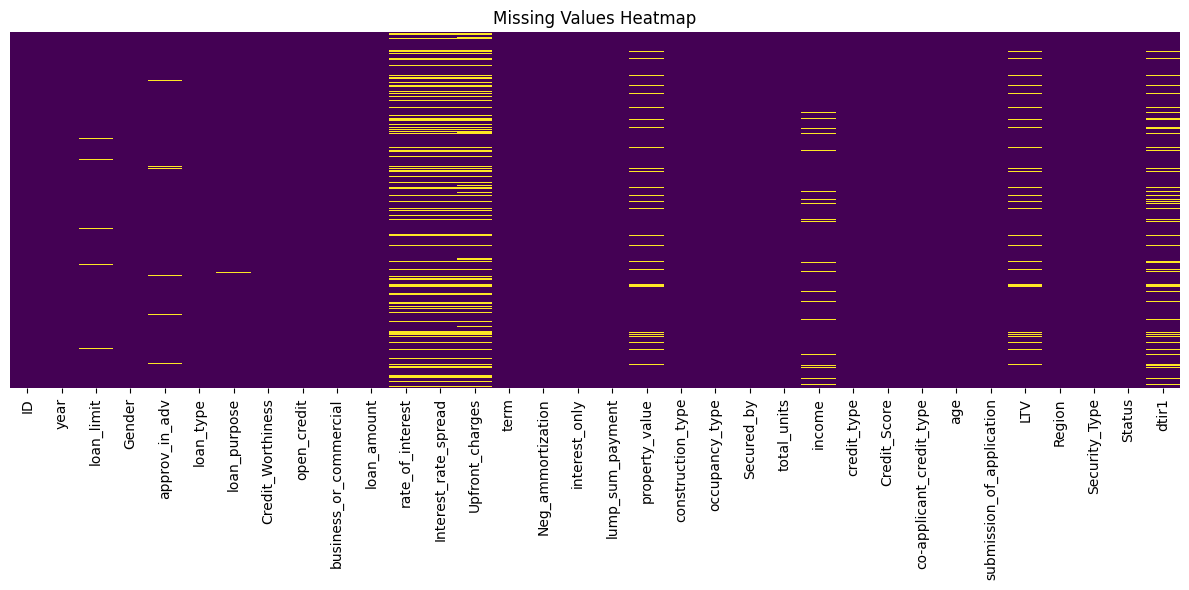

Missing values after:
 Series([], dtype: int64)
Dropped columns: ['ID', 'year']


In [11]:
# 1 Missing value inspection
def find_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values[missing_values > 0]

print("Missing values before:\n", find_missing_values(df))

# 2 Missing values heatmap
def plot_missing_values_heatmap(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

plot_missing_values_heatmap(df)

# 3 Fill missing values
def fill_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    return df

df = fill_missing_values(df)
print("Missing values after:\n", find_missing_values(df))

# 4 Remove duplicates
df = df.drop_duplicates()

# 5 Drop irrelevant columns
def drop_irrelevant_columns(df, target='Status'):
    to_drop = []
    if 'ID' in df.columns:
        to_drop.append('ID')
    for col in df.columns:
        if col == target:
            continue
        if df[col].isnull().mean() > 0.6:
            to_drop.append(col)
        elif df[col].nunique() <= 1:
            to_drop.append(col)
    df = df.drop(columns=to_drop)
    print("Dropped columns:", to_drop)
    return df

df = drop_irrelevant_columns(df)

# 6 Data type conversion
def convert_data_types(df):
    binary_map = {'Yes': 1, 'No': 0, 'Y': 1, 'N': 0, 'True': 1, 'False': 0}
    df.replace(binary_map, inplace=True)
    for col in df.select_dtypes(include=['object']).columns:
        if df[col].nunique() <= 20:
            df[col] = df[col].astype('category')
    if 'Status' in df.columns:
        df['Status'] = pd.to_numeric(df['Status'], errors='coerce').fillna(0).astype(int)
    return df

df = convert_data_types(df)


        loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
count  1.486700e+05     148670.000000         148670.000000    148670.000000   
mean   3.311177e+05          4.031879              0.429024      3057.397919   
std    1.839093e+05          0.488348              0.445907      2797.972965   
min    1.650000e+04          0.000000             -3.638000         0.000000   
25%    1.965000e+05          3.750000              0.181500      1250.000000   
50%    2.965000e+05          3.990000              0.390400      2596.450000   
75%    4.365000e+05          4.250000              0.620000      3889.495000   
max    3.576500e+06          8.000000              3.357000     60000.000000   

                term  property_value         income   Credit_Score  \
count  148670.000000    1.486700e+05  148670.000000  148670.000000   
mean      335.143438    4.897800e+05    6883.647811     699.789103   
std        58.402488    3.420221e+05    6300.067060     115.875857   

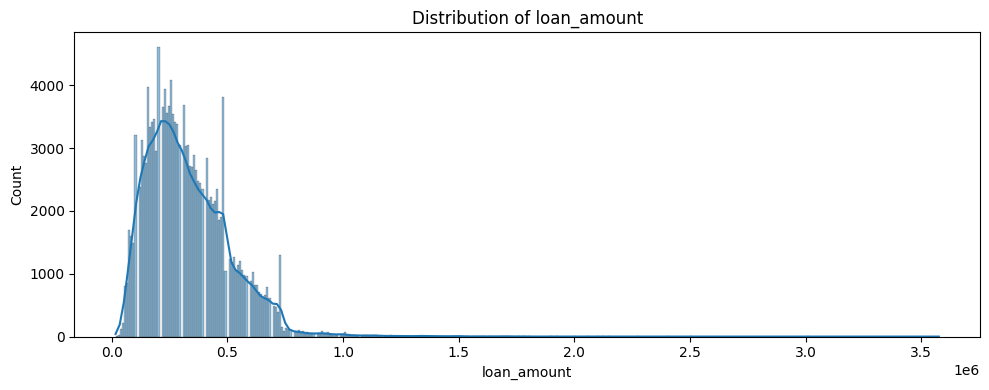

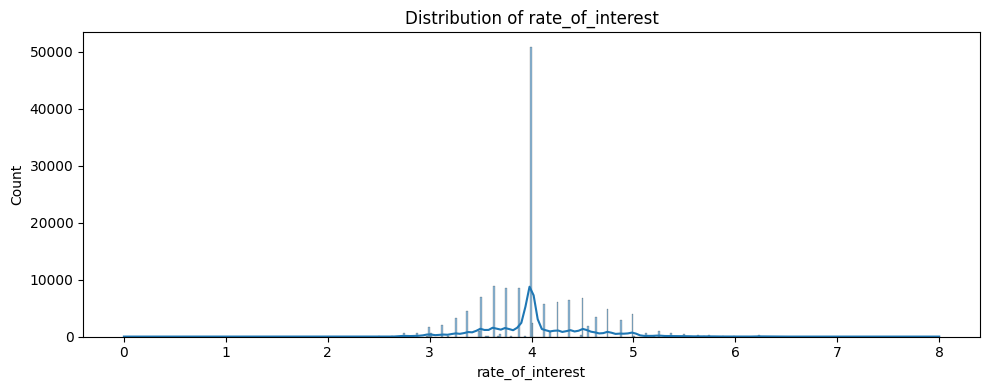

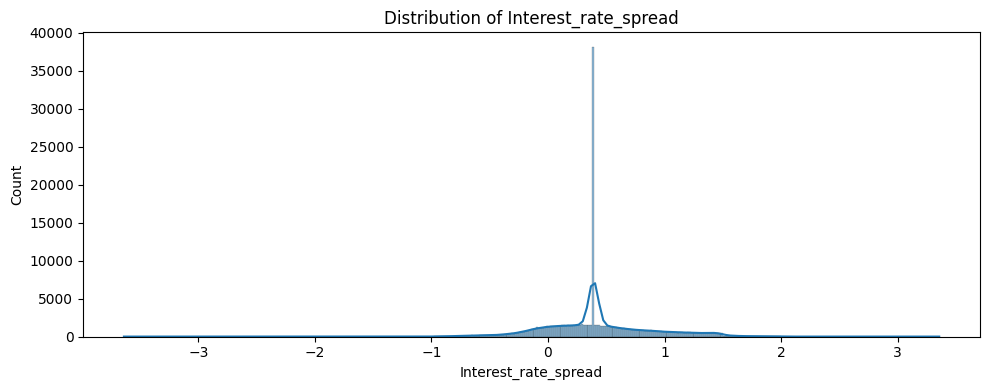

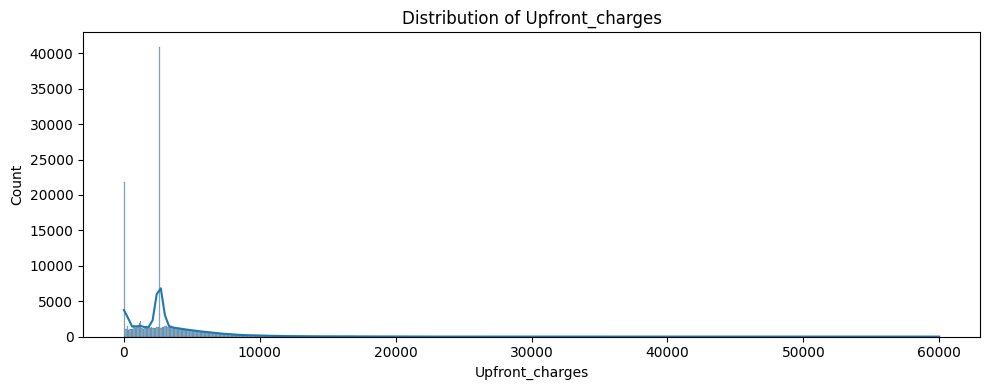

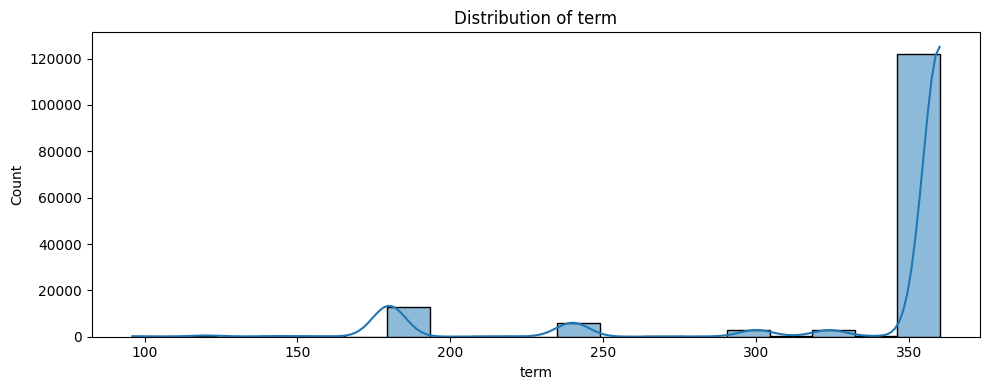

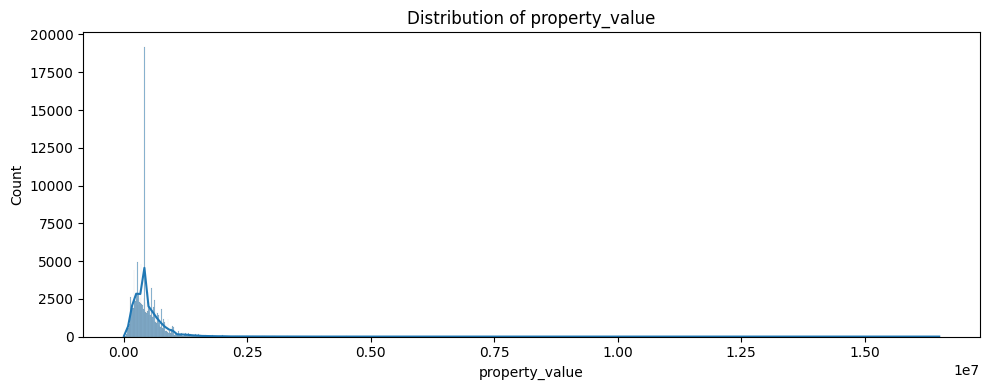

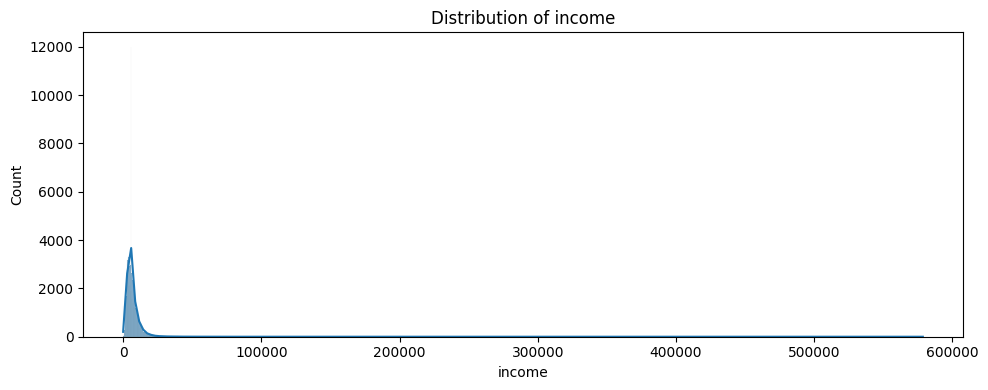

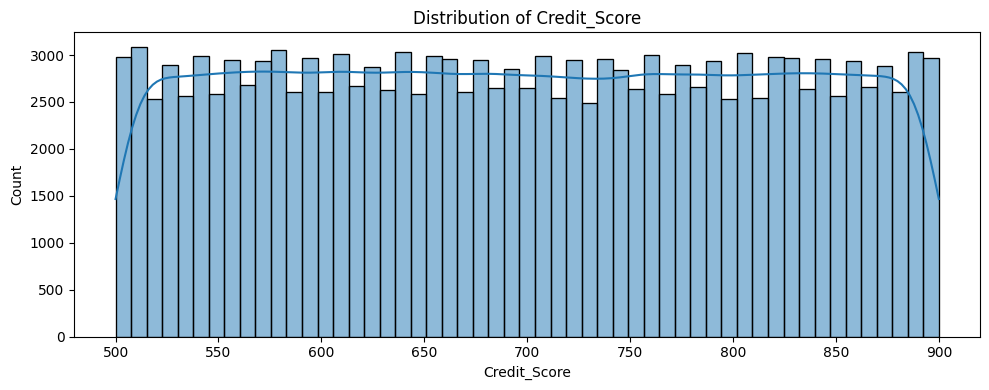

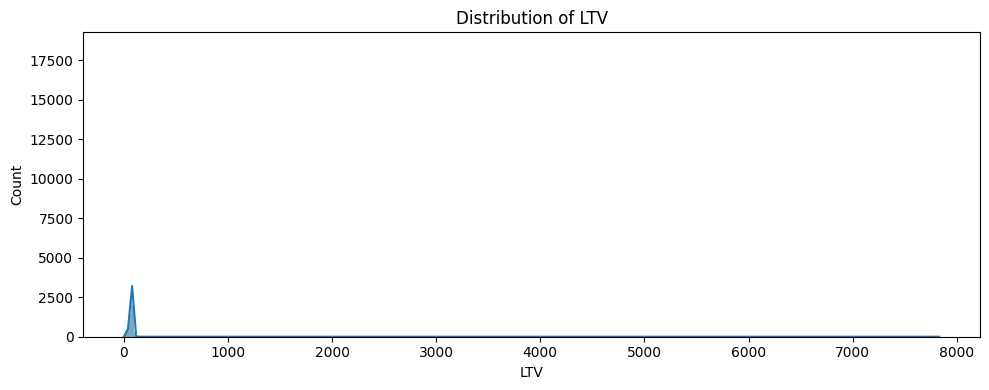

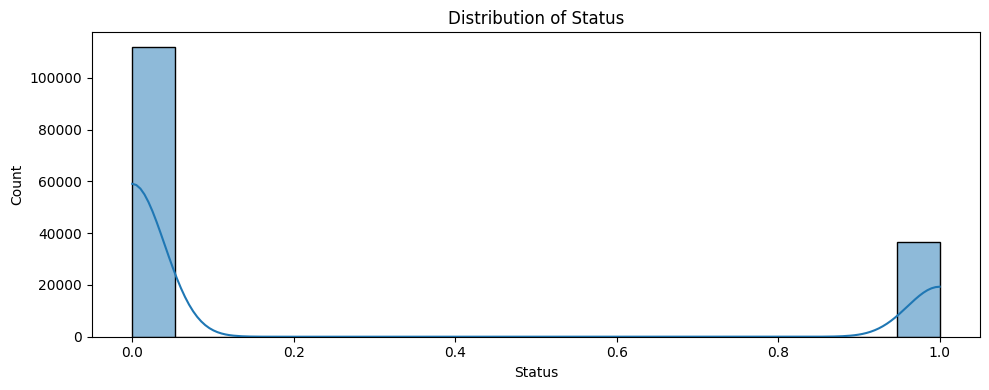

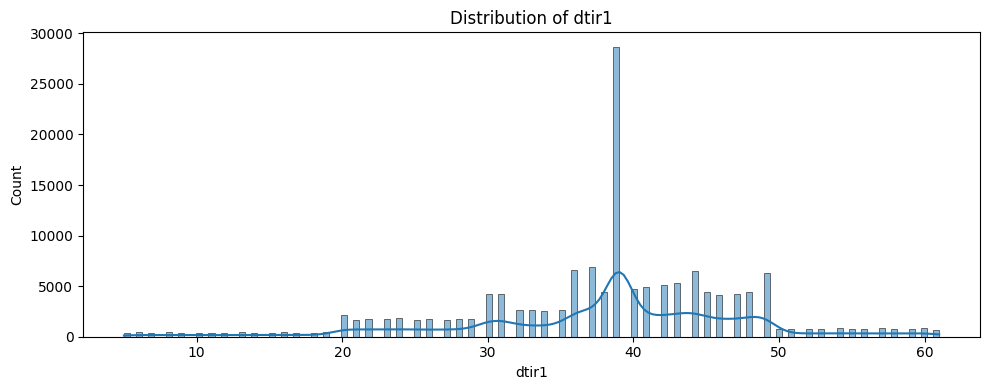

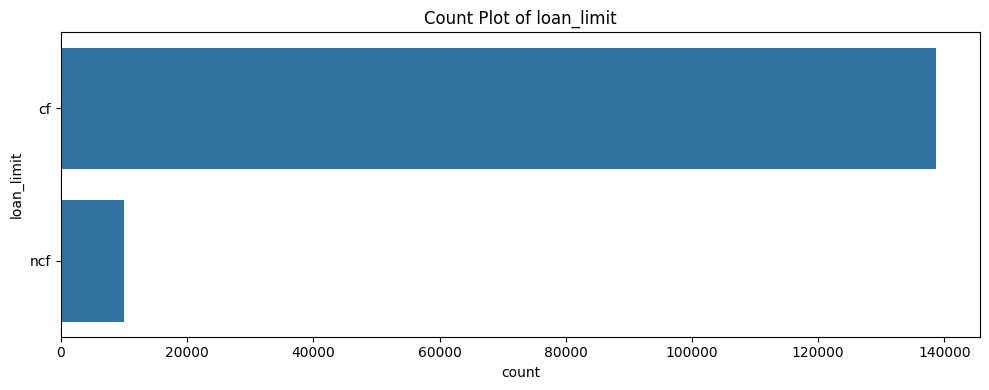

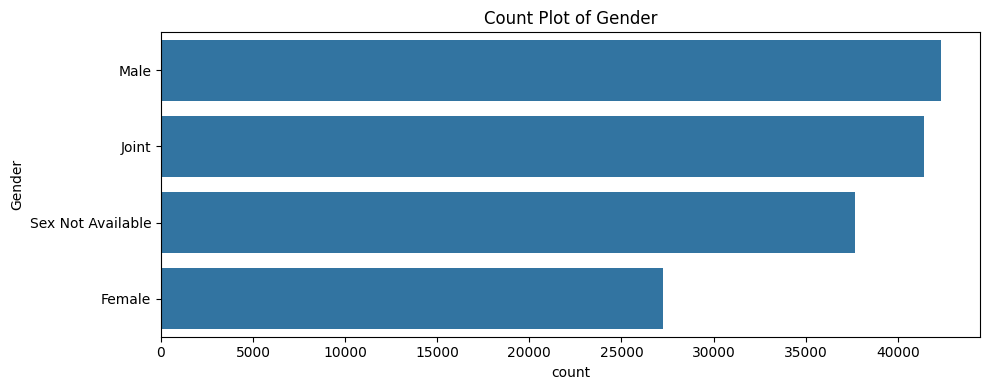

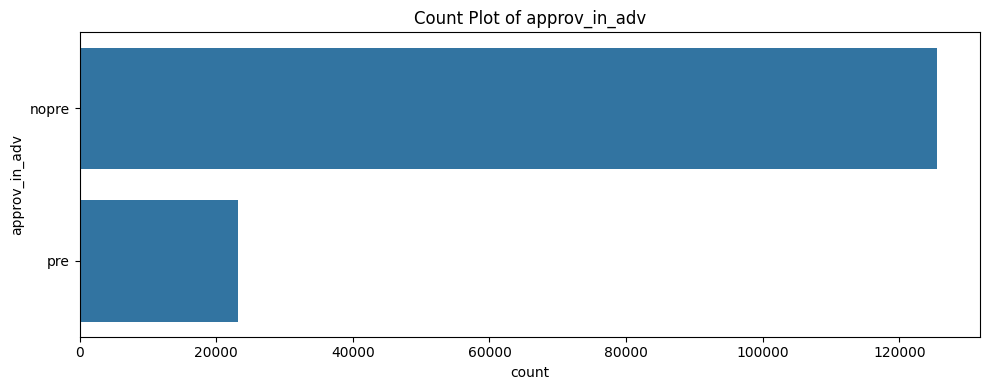

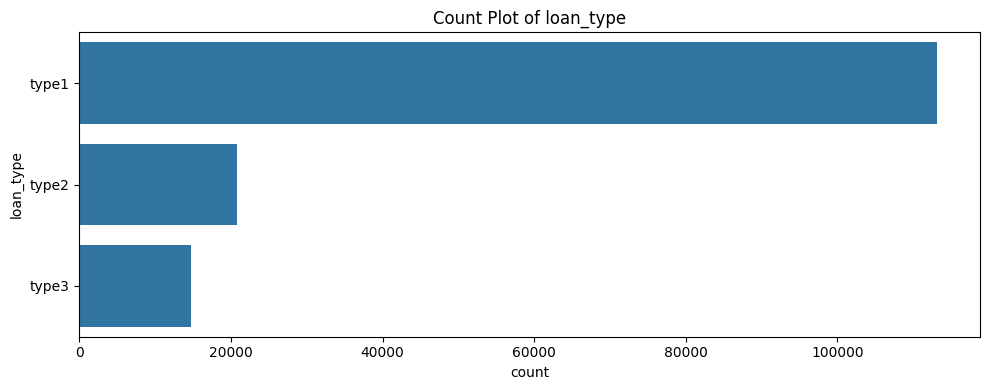

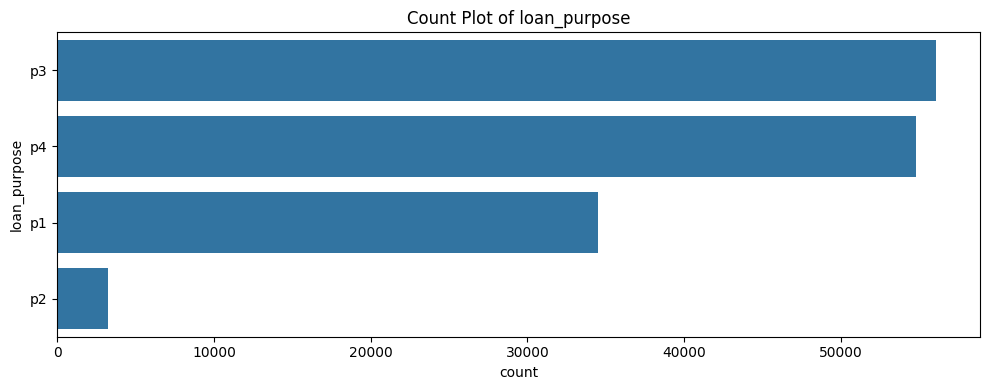

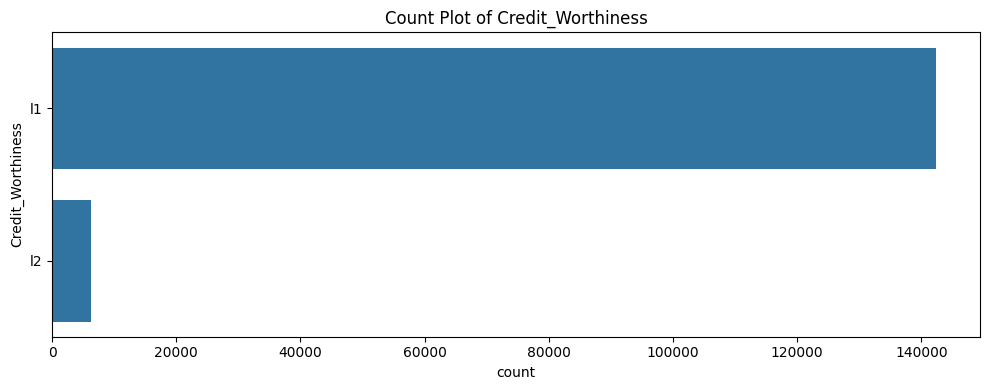

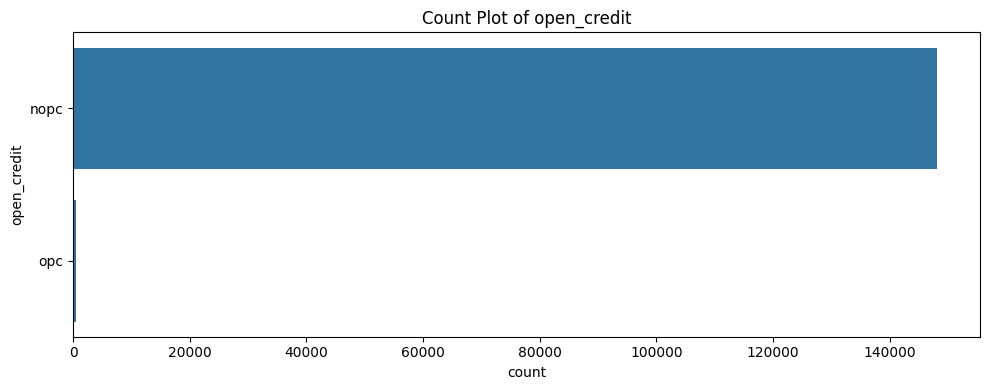

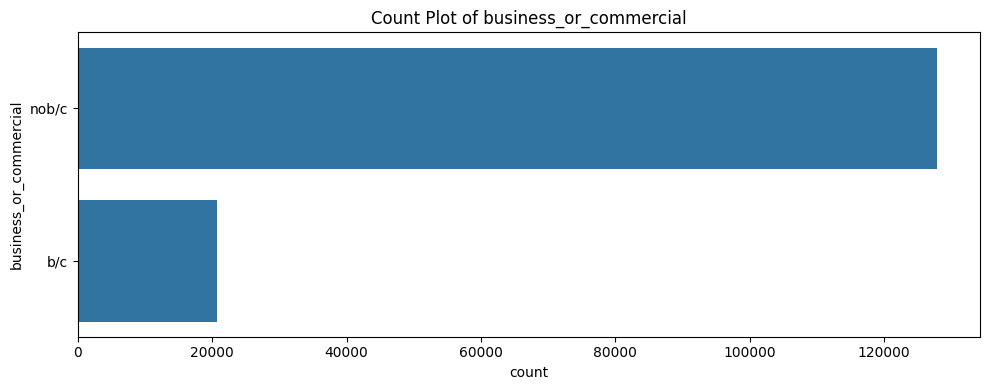

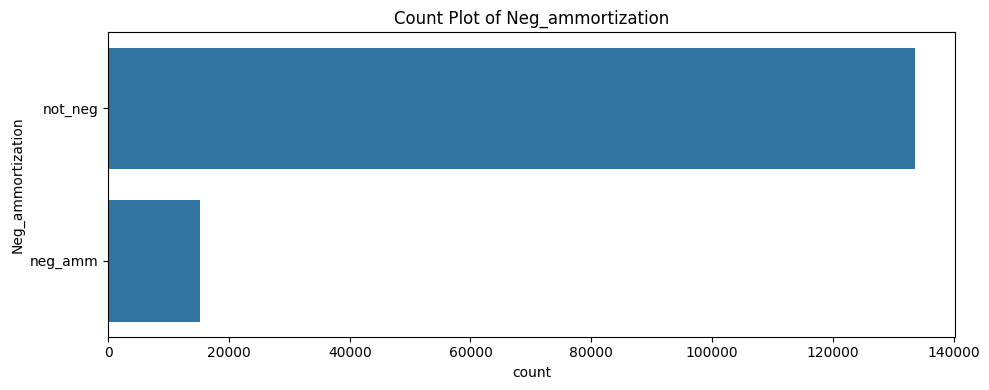

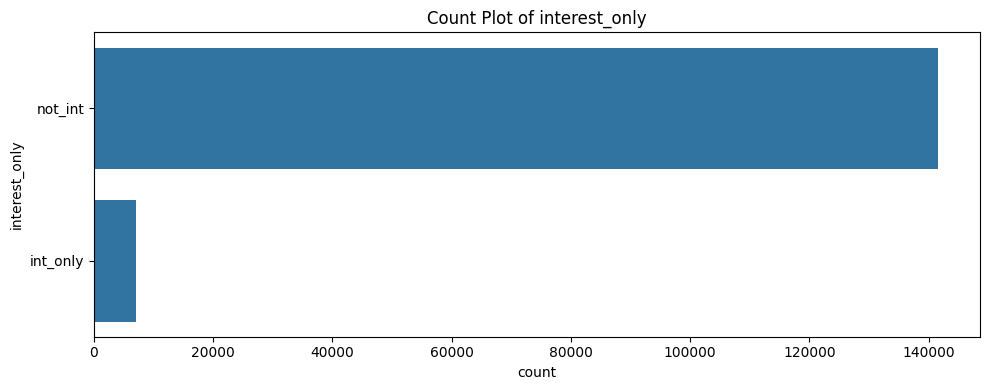

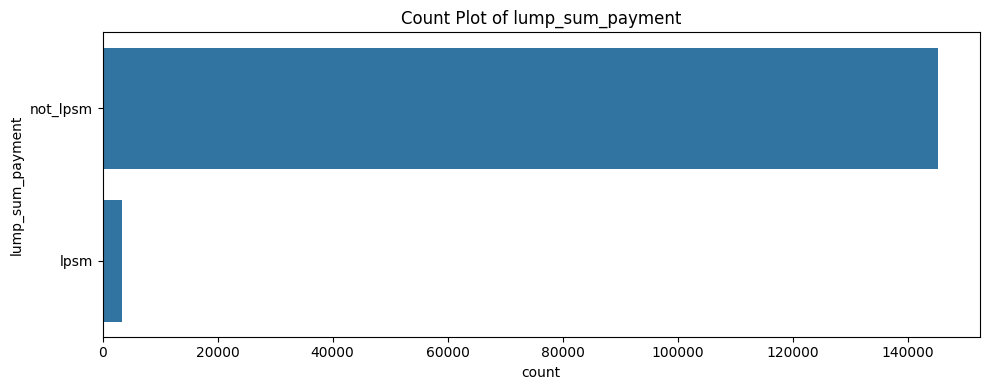

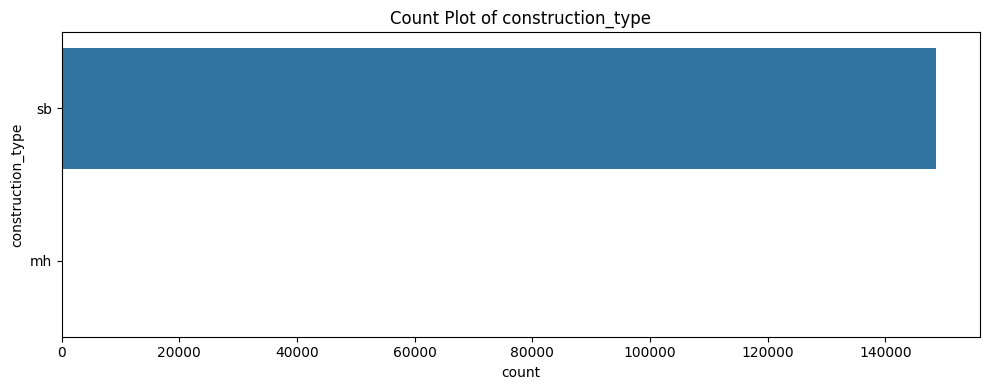

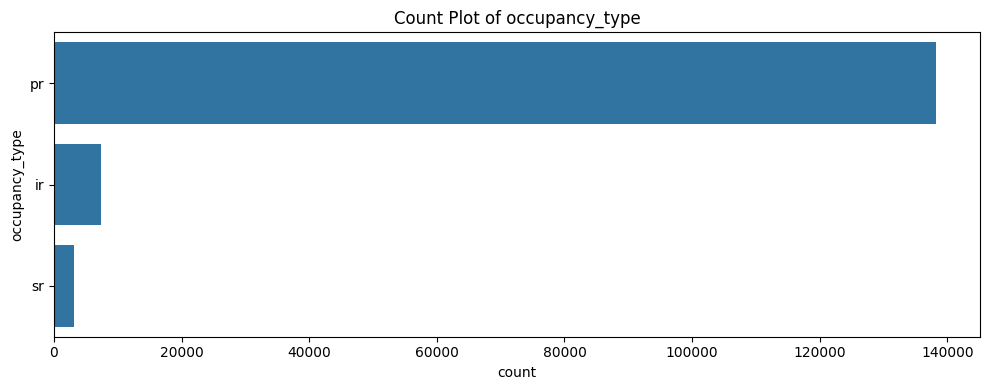

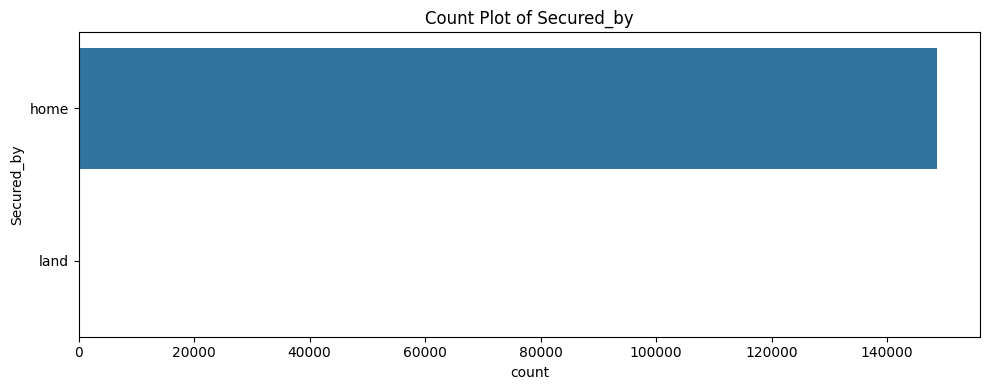

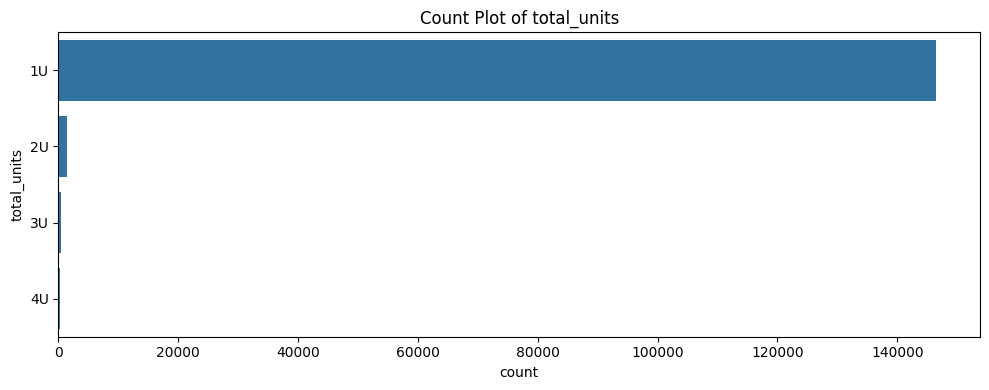

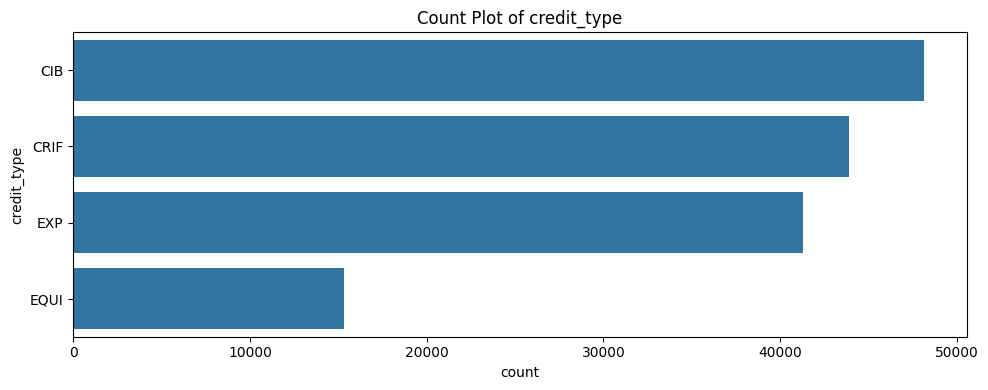

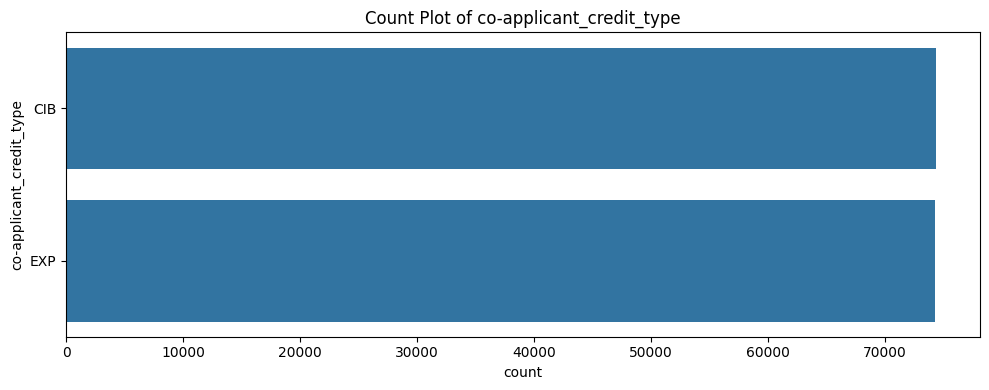

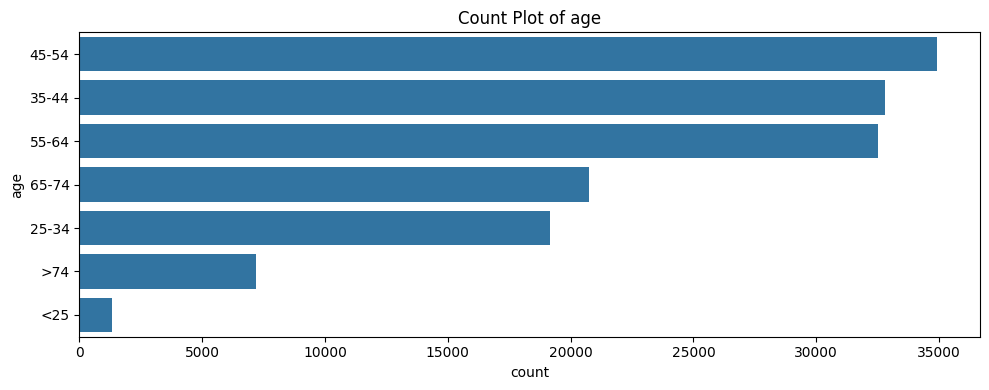

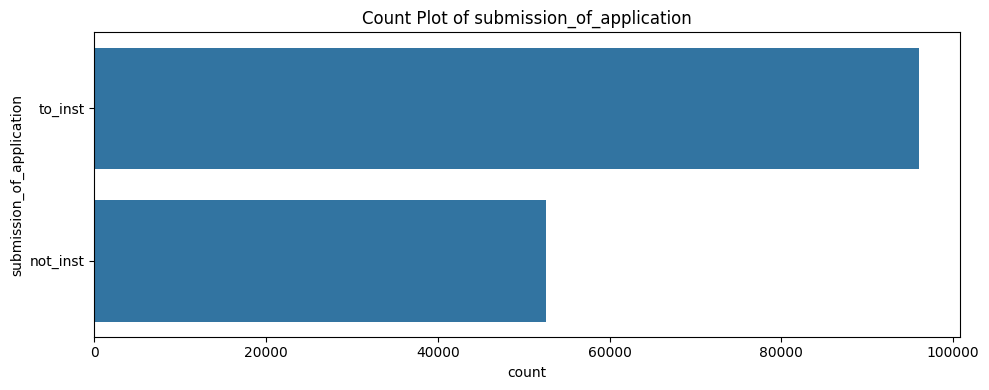

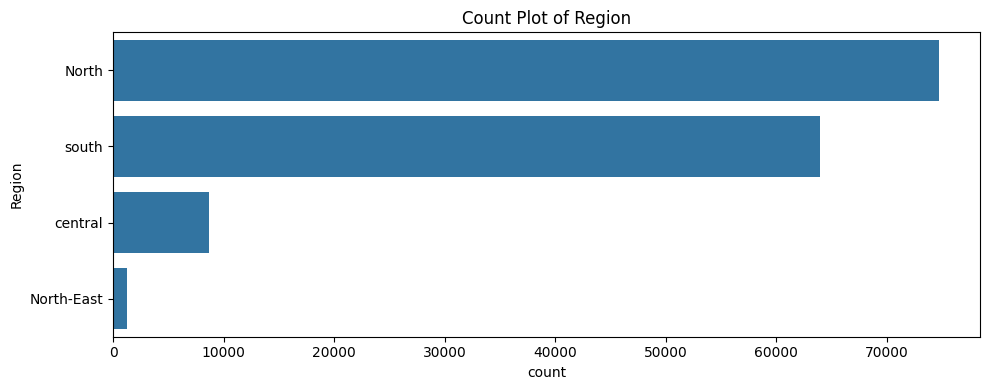

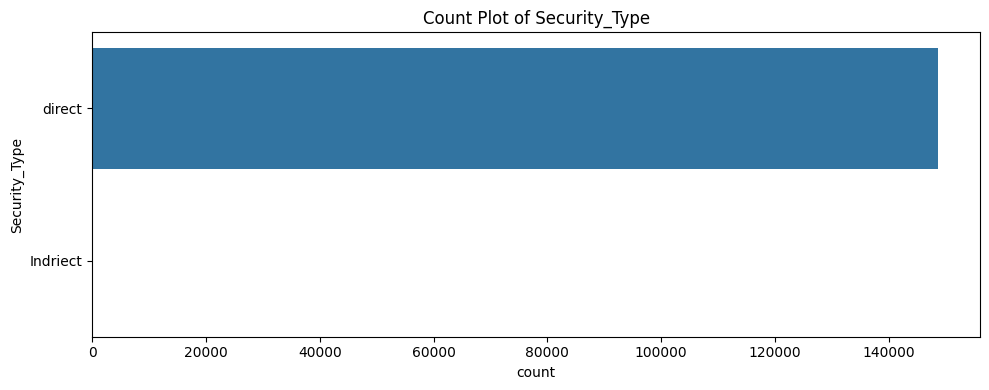

In [12]:
# 7 Numeric summary statistics
def numeric_summary(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    return numeric_cols.describe()

print(numeric_summary(df))

# 8 Categorical summary statistics
def categorical_summary(df, verbose=True):
    cats = df.select_dtypes(include=['object', 'category'])
    if len(cats.columns)==0:
        if verbose: print(" No categorical columns found.")
        return pd.DataFrame(columns=["count","unique","top","freq"])
    if verbose: print(cats.describe())
    return cats.describe()

categorical_summary(df)

# 9 Plot numeric distributions
def plot_distributions(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.tight_layout()
        plt.show()

plot_distributions(df)

# 10 Categorical count plots
def plot_categorical_counts(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.tight_layout()
        plt.show()

plot_categorical_counts(df)




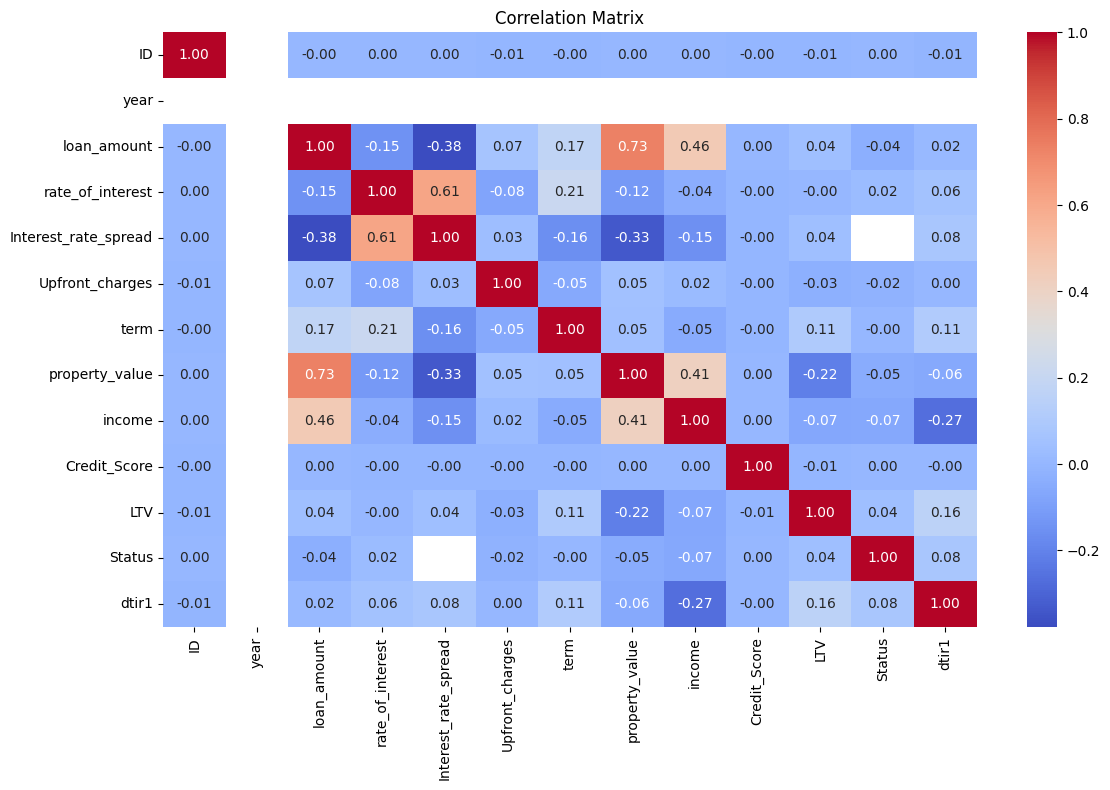

In [6]:
# 11 Correlation matrix

def correlation_matrix(df):
    corr = df.select_dtypes(include=[np.number]).corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

correlation_matrix(df)

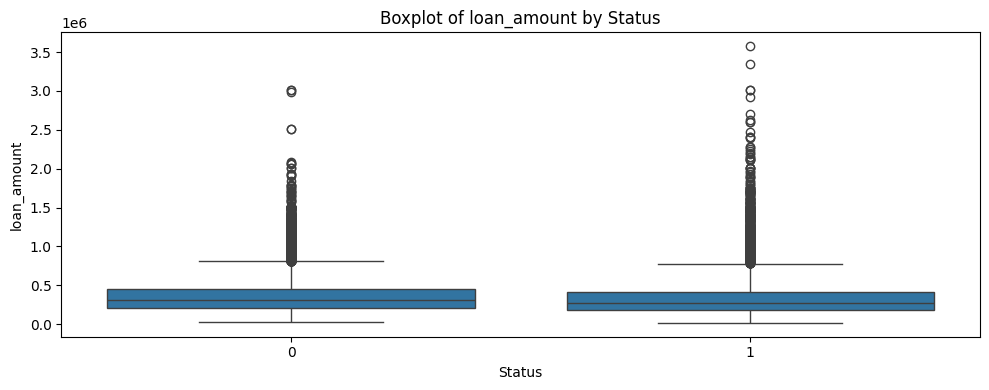

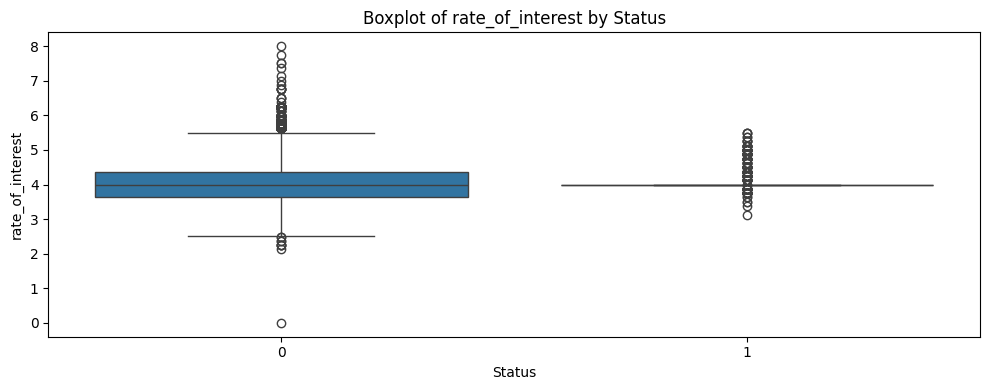

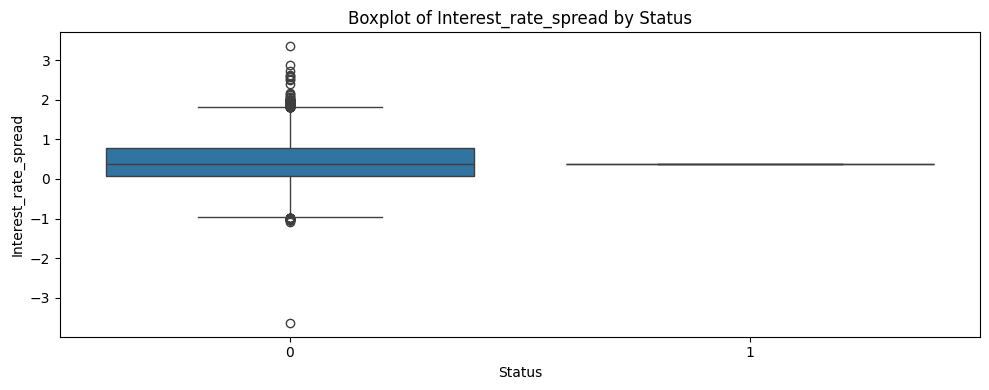

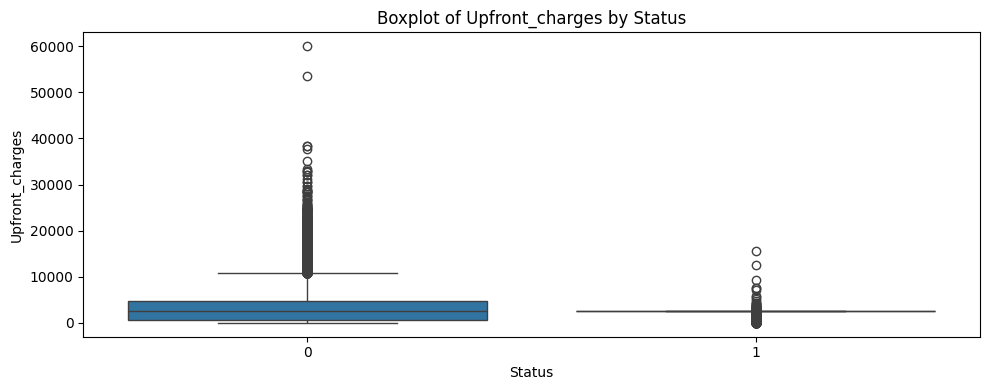

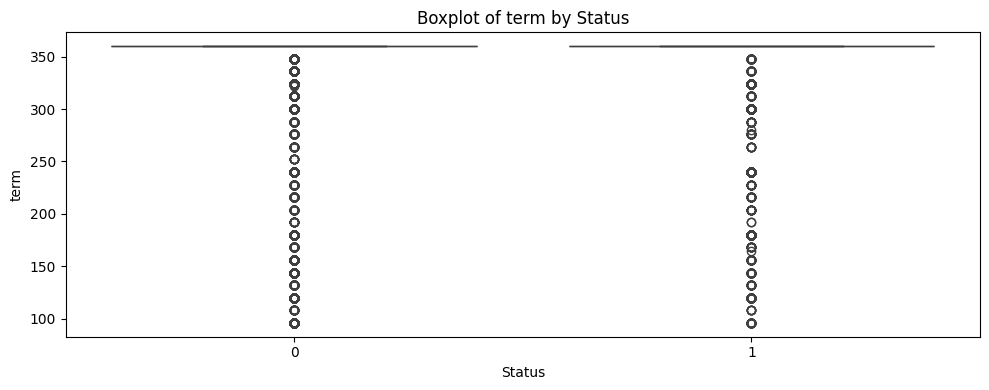

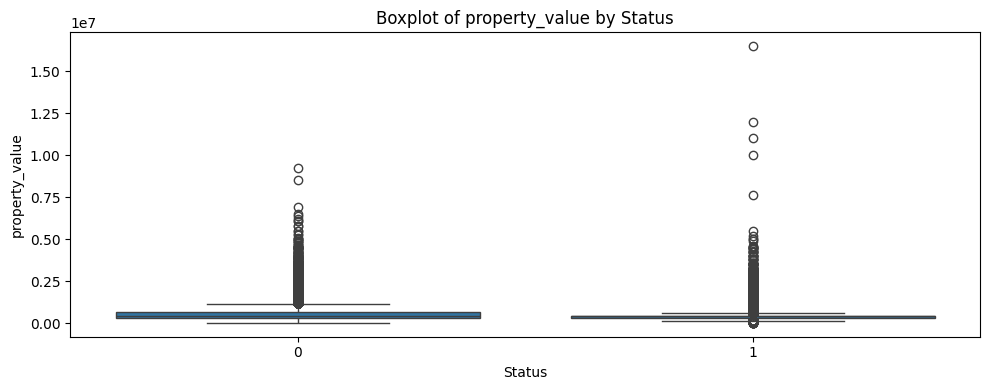

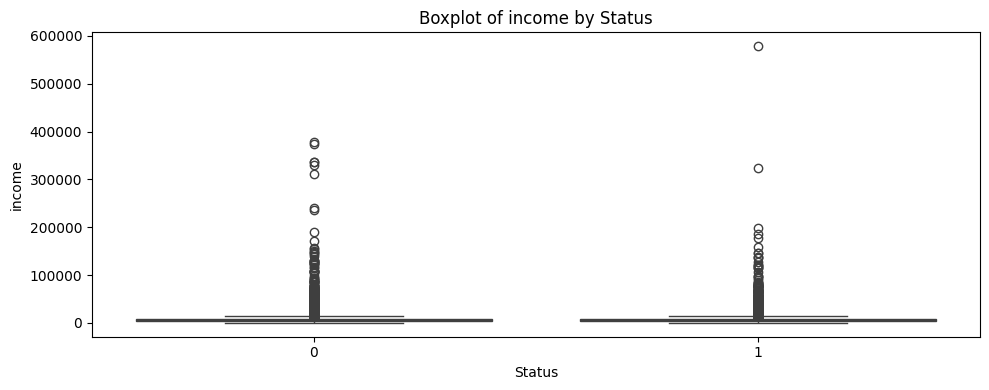

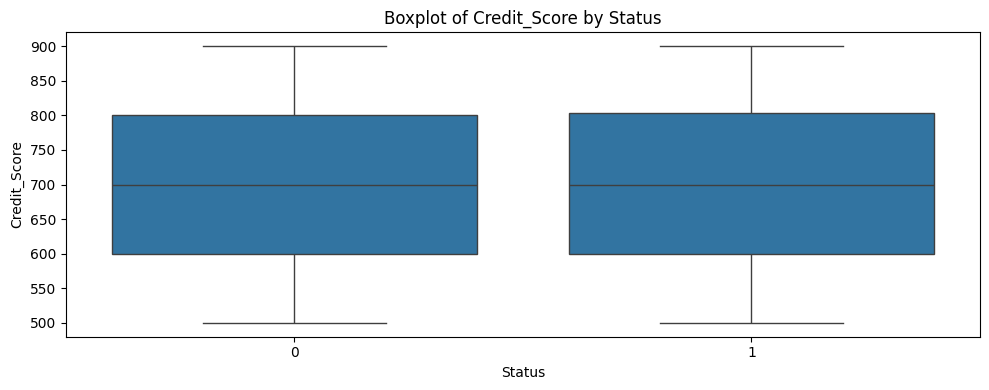

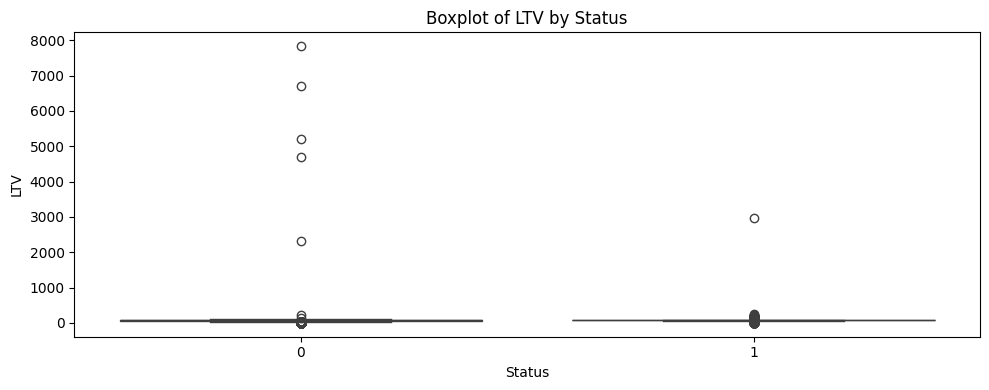

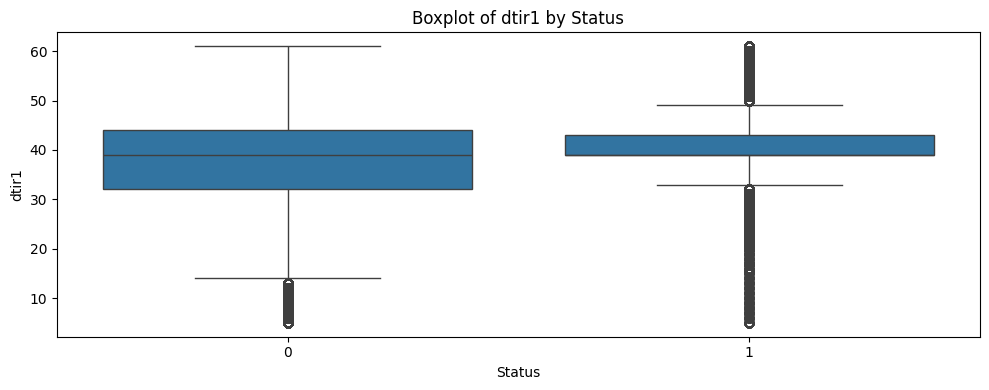

In [13]:
# 12 Boxplots grouped by Status
def plot_box_by_target(df, target='Status'):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [c for c in numeric_cols if c!=target]
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=df[target], y=df[col])
        plt.title(f'Boxplot of {col} by {target}')
        plt.tight_layout()
        plt.show()

plot_box_by_target(df)

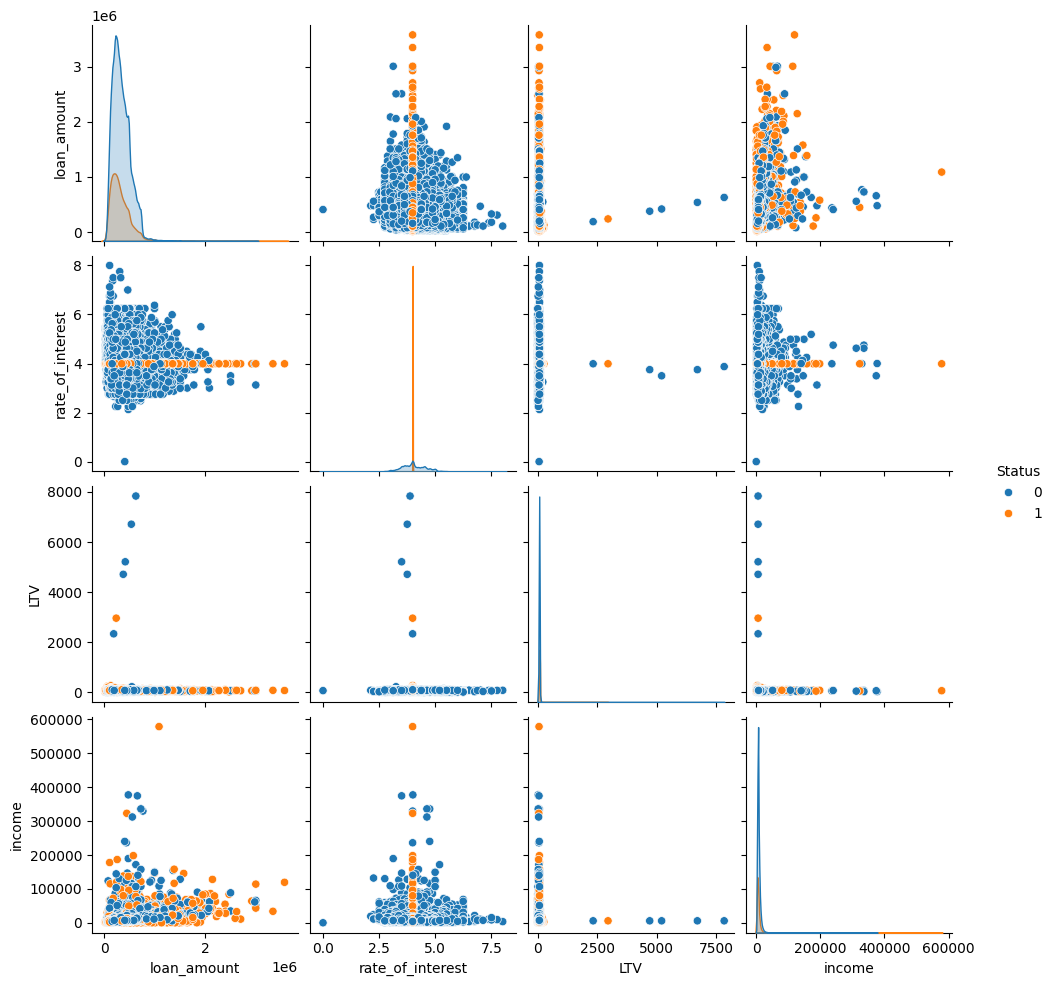

In [14]:
# 13 Pairplot
def plot_pairplot(df, target='Status'):
    cols = ['loan_amount','rate_of_interest','LTV','income',target]
    cols = [c for c in cols if c in df.columns]
    if len(cols)>=2:
        sns.pairplot(df[cols], hue=target, diag_kind='kde')
        plt.show()

plot_pairplot(df)

Generating full pairplot


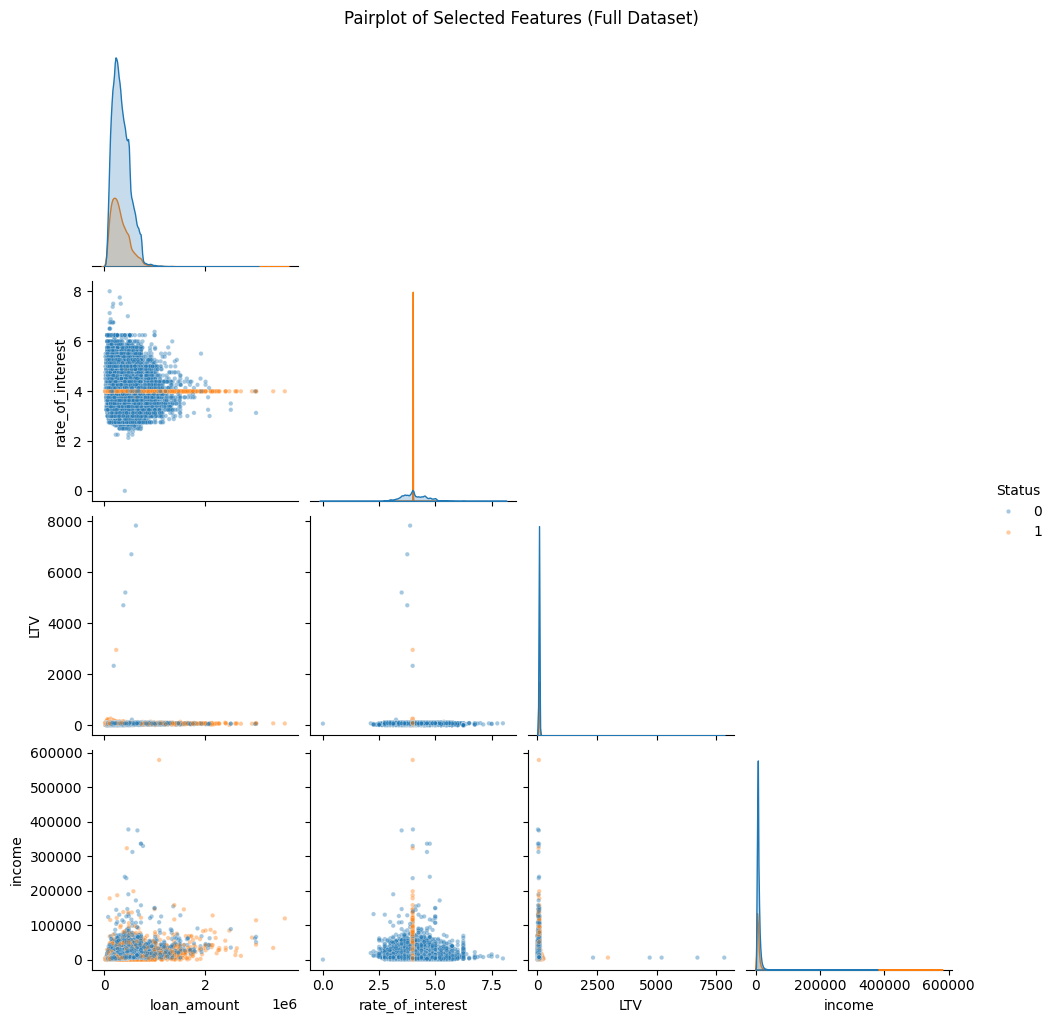

In [15]:
# 13 Pairplot (Full Dataset – Clean Version)
import seaborn as sns
import matplotlib.pyplot as plt

def plot_pairplot_full(df, target='Status'):

    cols = ['loan_amount', 'rate_of_interest', 'LTV', 'income', target]
    cols = [c for c in cols if c in df.columns]

    if len(cols) < 2:
        print("Not enough columns available for pairplot.")
        return

    print("Generating full pairplot")

    sns.pairplot(
        df[cols],
        hue=target,
        diag_kind='kde',
        corner=True,
        plot_kws={'alpha': 0.4, 's': 10}  # reduce clutter
    )

    plt.suptitle("Pairplot of Selected Features (Full Dataset)", y=1.02)
    plt.show()

plot_pairplot_full(df)


In [16]:
# 14 Interactive plots
import plotly.express as px
def interactive_scatter_plot(df, x, y, color=None):
    if x in df.columns and y in df.columns:
        fig = px.scatter(df, x=x, y=y, color=color)
        fig.show()

interactive_scatter_plot(df,'loan_amount','income','Status')


In [17]:
# 15 Save correlation matrix visualization

def save_visualizations(df):
    corr = df.select_dtypes(include=[np.number]).corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
    plt.tight_layout()
    plt.savefig("correlation_matrix.png")
    plt.close()

save_visualizations(df)

# 16 Export summary statistics
def export_summary_statistics(df, num='numeric_summary.csv', cat='categorical_summary.csv'):
    numeric_summary(df).to_csv(num)
    categorical_summary(df, verbose=False).to_csv(cat)

export_summary_statistics(df)

In [18]:
# 17 Train-test split
X = df.drop("Status", axis=1)
y = df["Status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 18 Encode categorical variables safely
def encode_after_split(X_train, X_test):
    cat_cols = X_train.select_dtypes(include=['object','category']).columns

    X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
    X_test  = pd.get_dummies(X_test,  columns=cat_cols, drop_first=True)

    # Keep ONLY train columns
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    return X_train, X_test

X_train, X_test = encode_after_split(X_train, X_test)

# 19 Handle outliers safely (ONLY float columns)
def remove_outliers(X_train, X_test):
    numeric_cols = X_train.select_dtypes(include=['float64']).columns

    for col in numeric_cols:
        Q1 = X_train[col].quantile(0.25)
        Q3 = X_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        X_train[col] = X_train[col].clip(lower, upper)
        X_test[col]  = X_test[col].clip(lower, upper)

    return X_train, X_test

X_train, X_test = remove_outliers(X_train, X_test)

# 20 Scale all columns (OK)
from sklearn.preprocessing import MinMaxScaler
def scale_numeric_features(X_train, X_test):
    scaler = MinMaxScaler()
    X_train[X_train.columns] = scaler.fit_transform(X_train)
    X_test[X_test.columns]   = scaler.transform(X_test)
    return X_train, X_test

X_train, X_test = scale_numeric_features(X_train, X_test)

# 21 Save Data
train_data = pd.concat([X_train, y_train], axis=1)
test_data  = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Train_Cleaned.csv", index=False)
test_data.to_csv("/content/drive/MyDrive/Colab Notebooks/Test_Cleaned.csv", index=False)

print("Saved cleaned train/test files.")


Saved cleaned train/test files.


In [19]:
import numpy as np

perfect_cols = []

for col in X_train.columns:
    # Only check continuous or dummy columns, ignore target
    if col != "Status":
        if X_train[col].nunique() > 1:
            corr = abs(np.corrcoef(X_train[col], y_train)[0,1])
            if corr == 1.0:
                perfect_cols.append(col)

perfect_cols


[]

In [20]:
from sklearn.feature_selection import mutual_info_classif

import pandas as pd

mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)

mi_series.head(20)


Interest_rate_spread                 0.559878
Upfront_charges                      0.478952
rate_of_interest                     0.349237
LTV                                  0.173106
credit_type_EQUI                     0.164323
property_value                       0.137916
dtir1                                0.084673
lump_sum_payment_not_lpsm            0.028035
Neg_ammortization_not_neg            0.025871
income                               0.022904
construction_type_sb                 0.022474
submission_of_application_to_inst    0.021789
co-applicant_credit_type_EXP         0.021727
Security_Type_direct                 0.021239
interest_only_not_int                0.021147
business_or_commercial_nob/c         0.018883
credit_type_EXP                      0.014629
occupancy_type_pr                    0.013664
credit_type_CRIF                     0.013058
Region_south                         0.010849
dtype: float64

In [21]:
print("Train class proportions:")
print(y_train.value_counts(normalize=True))

print("\nTest class proportions:")
print(y_test.value_counts(normalize=True))


Train class proportions:
Status
0    0.753557
1    0.246443
Name: proportion, dtype: float64

Test class proportions:
Status
0    0.753548
1    0.246452
Name: proportion, dtype: float64


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
import numpy as np

# Identify columns
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c != "Status"]

# ---- Build Transformers ----
cat_encoder = OneHotEncoder(handle_unknown="ignore", drop="first")
num_scaler = MinMaxScaler()

# ---- Preprocessor Pipeline ----
preprocessor = ColumnTransformer(
    transformers=[
        ("categorical", cat_encoder, categorical_cols),
        ("numeric", num_scaler, numeric_cols)
    ]
)

# Fit on full data BEFORE splitting
preprocessor.fit(df.drop("Status", axis=1))

print("Preprocessor ready.")


Preprocessor ready.


In [25]:
model_results = []
roc_data = {}
evaluation_results = []

 Linear Regression Train R^2: 0.4285, Test R^2: 0.4422
 MAE:  0.2260
 MSE:  0.1036
 RMSE: 0.3219
 R2 (test): 0.4422


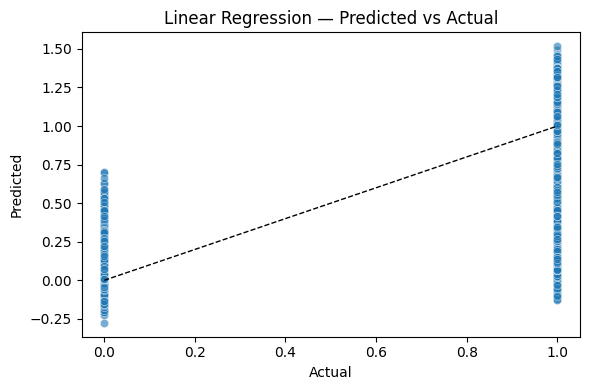

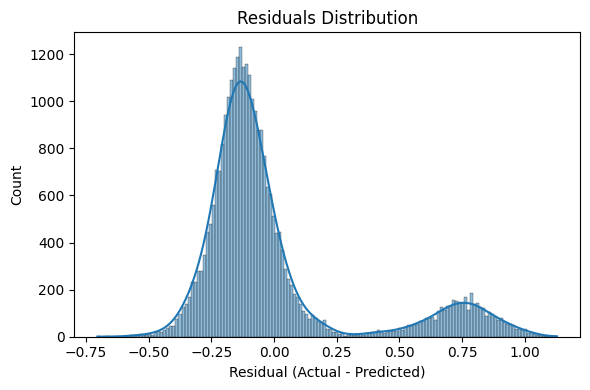

In [ ]:

#train linear regression model as a test
from sklearn.linear_model import LinearRegression
def train_linear_regression(X_train, y_train, X_test, y_test):
    """Train and evaluate a linear regression model."""
    model = LinearRegression()
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f" Linear Regression Train R^2: {train_score:.4f}, Test R^2: {test_score:.4f}")

    #  metrics & plots
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # Predictions on test set
    y_pred = model.predict(X_test)

    # Metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)   # redundant if you already printed .score(), but safe

    print(f" MAE:  {mae:.4f}")
    print(f" MSE:  {mse:.4f}")
    print(f" RMSE: {rmse:.4f}")
    print(f" R2 (test): {r2:.4f}")

    # Predicted vs Actual scatter
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Linear Regression — Predicted vs Actual")
    plt.tight_layout()
    plt.show()

    # Residuals histogram + KDE
    residuals = y_test - y_pred
    plt.figure(figsize=(6,4))
    sns.histplot(residuals, kde=True)
    plt.xlabel("Residual (Actual - Predicted)")
    plt.title("Residuals Distribution")
    plt.tight_layout()
    plt.show()

    model_results.append(["Linear Regression", test_score])


train_linear_regression(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION


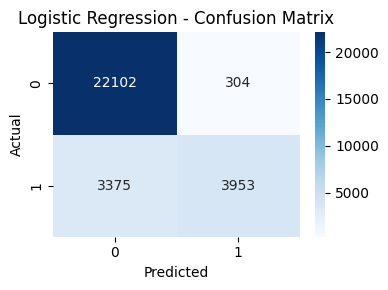

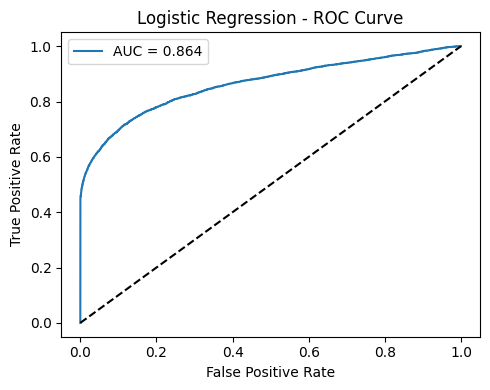

 Train Accuracy: 0.8717, Test Accuracy: 0.8763
 Train Precision: 0.9220, Test Precision: 0.9286
 Train Recall: 0.5236, Test Recall: 0.5394
 Train F1 Score: 0.6679, Test F1 Score: 0.6824
 Train ROC-AUC: 0.8606, Test ROC-AUC: 0.8639
 Train Log Loss: 0.3327, Test Log Loss: 0.3258


In [ ]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt
    import seaborn as sns

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    logloss = log_loss(y_test, y_prob)


    print(f"LOGISTIC REGRESSION")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Logistic Regression - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Logistic Regression - ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    y_train_prob = model.predict_proba(X_train)[:, 1]
    y_train_pred = (y_train_prob >= 0.5).astype(int)

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)
    train_auc       = roc_auc_score(y_train, y_train_prob)
    train_logloss   = log_loss(y_train, y_train_prob)


    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")
    print(f" Train Log Loss: {train_logloss:.4f}, Test Log Loss: {logloss:.4f}")


    model_results.append(["Logistic Regression", test_score])

    evaluation_results.append([
        "Logistic Regression",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])

train_logistic_regression(X_train, y_train, X_test, y_test)



Decision Tree


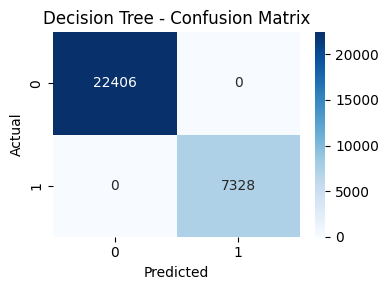

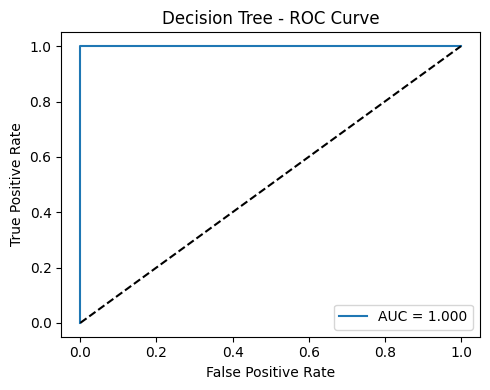

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    print("Decision Tree")

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = model.predict(X_test)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.decision_function(X_test)
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Decision Tree - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Decision Tree - ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.show()

    y_train_pred = model.predict(X_train)

    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Decision Tree", test_score])

    evaluation_results.append([
        "Decision Tree",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])

train_decision_tree(X_train, y_train, X_test, y_test)

Random Forest


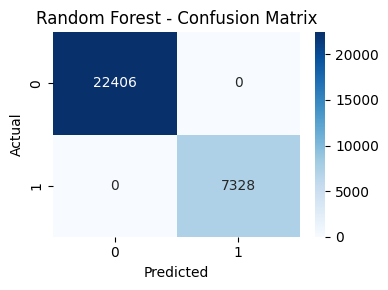

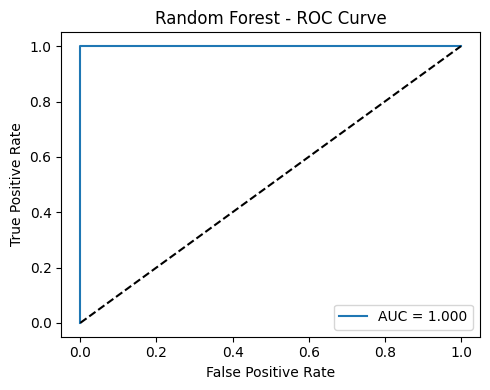

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("Random Forest")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = model.predict(X_test)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.decision_function(X_test)
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Random Forest - Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout(); plt.show()

    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.title("Random Forest - ROC Curve")
        plt.legend(); plt.tight_layout(); plt.show()

    y_train_pred = model.predict(X_train)

    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Random Forest", test_score])

    evaluation_results.append([
        "Random Forest",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_random_forest(X_train, y_train, X_test, y_test)


In [ ]:
#hyperparameter tuning with grid search for random forest
from sklearn.model_selection import GridSearchCV
def hyperparameter_tuning_rf(X_train, y_train):
    """Perform hyperparameter tuning for Random Forest using GridSearchCV."""
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(" Best parameters found:", grid_search.best_params_)
    print(" Best cross-validation accuracy:", grid_search.best_score_)
hyperparameter_tuning_rf(X_train, y_train)


 Best parameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
 Best cross-validation accuracy: 1.0


KNN


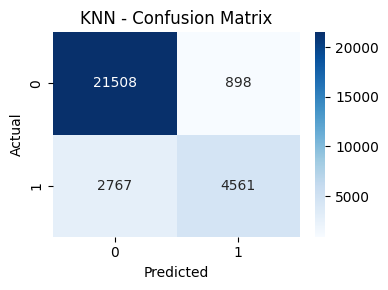

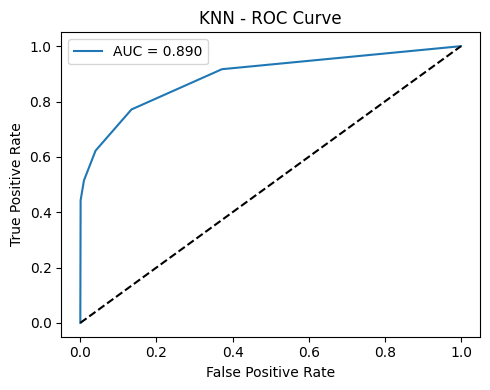

 Train Accuracy: 0.9124, Test Accuracy: 0.8767
 Train Precision: 0.9133, Test Precision: 0.8355
 Train Recall: 0.7121, Test Recall: 0.6224
 Train F1 Score: 0.8002, Test F1 Score: 0.7134
 Train ROC-AUC: 0.9635, Test ROC-AUC: 0.8898


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def train_knn(X_train, y_train, X_test, y_test, n_neighbors=5):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)

    print("KNN")

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = model.predict(X_test)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.decision_function(X_test)
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("KNN - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("KNN - ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # TRAIN METRICS
    y_train_pred = model.predict(X_train)
    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1 = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["KNN", test_score])

    evaluation_results.append([
        "KNN",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_knn(X_train, y_train, X_test, y_test, n_neighbors=5)


Naive Bayes


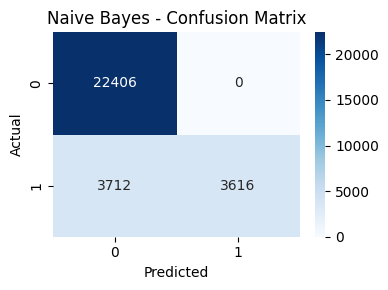

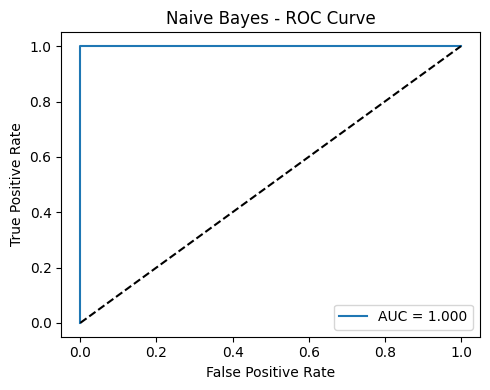

 Train Accuracy: 0.8700, Test Accuracy: 0.8752
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 0.4723, Test Recall: 0.4934
 Train F1 Score: 0.6416, Test F1 Score: 0.6608
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from sklearn.naive_bayes import GaussianNB

def train_naive_bayes(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)

    print("Naive Bayes")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = model.predict(X_test)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.decision_function(X_test)
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Naive Bayes - Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout(); plt.show()

    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1], 'k--')
        plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
        plt.title("Naive Bayes - ROC Curve")
        plt.legend(); plt.tight_layout(); plt.show()

    # TRAIN METRICS
    y_train_pred = model.predict(X_train)
    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Naive Bayes", test_score])

    evaluation_results.append([
        "Naive Bayes",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_naive_bayes(X_train, y_train, X_test, y_test)

In [22]:
print(y.value_counts(normalize=True)*100)


Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


BALANCED RANDOM FOREST


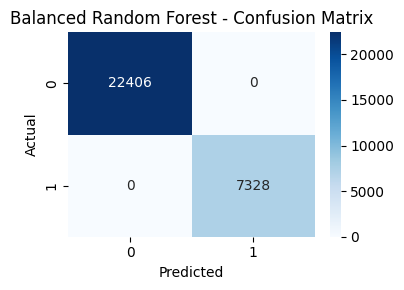

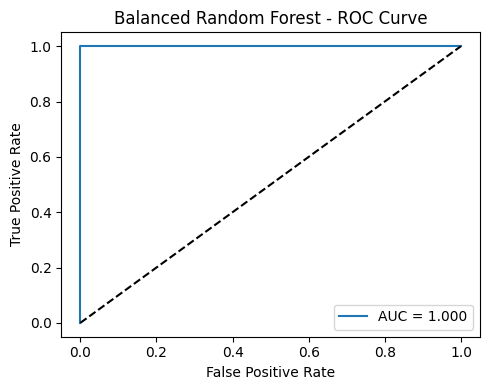

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

def train_balanced_random_forest(X_train, y_train, X_test, y_test):

    model = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    print("BALANCED RANDOM FOREST")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import (
        precision_score, recall_score, f1_score,
        roc_auc_score, confusion_matrix, roc_curve
    )
    import matplotlib.pyplot as plt
    import seaborn as sns

    # TEST SET
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_prob)

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Balanced Random Forest - Confusion Matrix")
    plt.xlabel("Predicted"); plt.ylabel("Actual")
    plt.tight_layout(); plt.show()

    # ROC CURVE
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1],[0,1],'k--')
    plt.title("Balanced Random Forest - ROC Curve")
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.legend(); plt.tight_layout(); plt.show()

    # TRAIN METRICS
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)
    train_auc       = roc_auc_score(y_train, y_train_prob)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Balanced Random Forest", test_score])

    evaluation_results.append([
        "Balanced Random Forest",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])

    roc_data["Balanced Random Forest"] = (fpr, tpr, roc_auc)
train_balanced_random_forest(X_train, y_train, X_test, y_test)

In [ ]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.6 MB/s eta 0:00:00


In [ ]:
# Fix XGBoost illegal characters in column names
X_train.columns = X_train.columns.str.replace(r'[\[\]<>]', '', regex=True)
X_test.columns  = X_test.columns.str.replace(r'[\[\]<>]', '', regex=True)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning:

[17:47:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.




XGBOOST


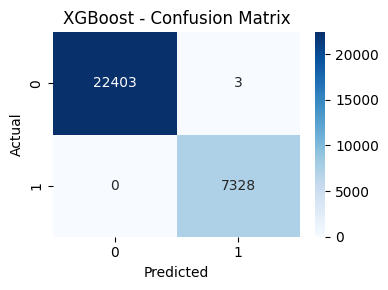

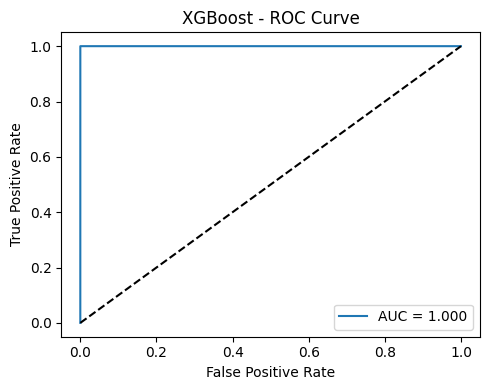

 Train Accuracy: 1.0000, Test Accuracy: 0.9999
 Train Precision: 1.0000, Test Precision: 0.9996
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 0.9998
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
import xgboost as xgb

def train_xgboost(X_train, y_train, X_test, y_test):
    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    model.fit(X_train, y_train)

    print("XGBOOST")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np

    # TEST PREDICTIONS
    y_pred = model.predict(X_test)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.decision_function(X_test)
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    # CONFUSION MATRIX
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("XGBoost - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC CURVE
    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1],[0,1],'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("XGBoost - ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # TRAIN METRICS
    y_train_pred = model.predict(X_train)

    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc    = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    # STORE RESULTS FOR FINAL TABLE
    model_results.append(["XGBoost", test_score])

    evaluation_results.append([
        "XGBoost",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])

    if y_score is not None:
        roc_data["XGBoost"] = (fpr, tpr, roc_auc)
train_xgboost(X_train, y_train, X_test, y_test)


CatBoost


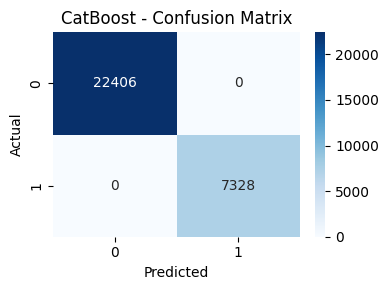

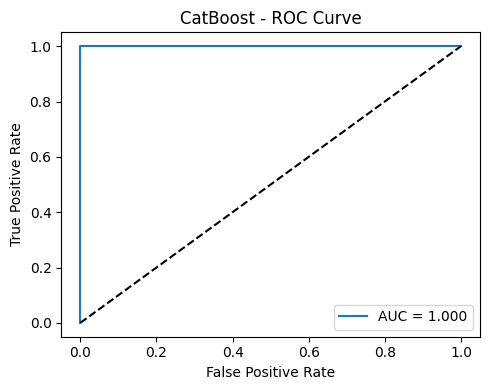

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 0.9999, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from catboost import CatBoostClassifier

def train_catboost(X_train, y_train, X_test, y_test):
    model = CatBoostClassifier(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    print("CatBoost")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = model.predict(X_test).astype(int)


    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.predict(X_test, prediction_type='Probability')[:, 1]
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("CatBoost - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if y_score is not None:
        fpr, tpr, _ = roc_curve(y_test, y_score)
        plt.figure(figsize=(5,4))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("CatBoost - ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.show()

    y_train_pred = model.predict(X_train).astype(int)


    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["CatBoost", test_score])

    evaluation_results.append([
        "CatBoost",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_catboost(X_train, y_train, X_test, y_test)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 29311, number of negative: 89625
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.242062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1633
[LightGBM] [Info] Number of data points in the train set: 118936, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.246443 -> initscore=-1.117671
[LightGBM] [Info] Start training from score -1.117671
LightGBM


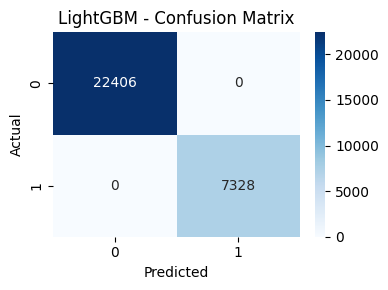

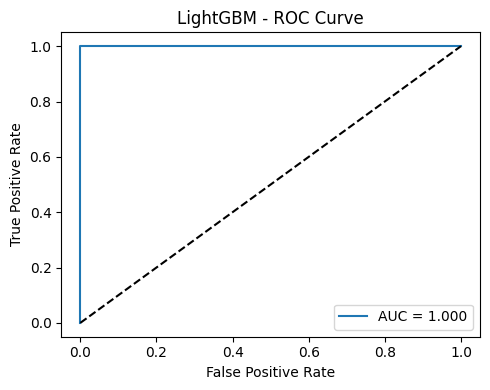

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
import lightgbm as lgb

def train_lightgbm(X_train, y_train, X_test, y_test):
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train)

    print("LightGBM")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = model.predict(X_test).astype(int)

    try:
        y_score = model.predict_proba(X_test)[:, 1]
    except:
        try:
            y_score = model.predict(X_test)
        except:
            y_score = None

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_score) if (y_score is not None and len(set(y_score)) > 1) else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("LightGBM - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if y_score is not None:
        try:
            fpr, tpr, _ = roc_curve(y_test, y_score)
            plt.figure(figsize=(5,4))
            plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
            plt.plot([0,1], [0,1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("LightGBM - ROC Curve")
            plt.legend()
            plt.tight_layout()
            plt.show()
        except:
            pass

    y_train_pred = model.predict(X_train).astype(int)

    try:
        y_train_prob = model.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["LightGBM", test_score])

    evaluation_results.append([
        "LightGBM",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_lightgbm(X_train, y_train, X_test, y_test)

Voting Classifier


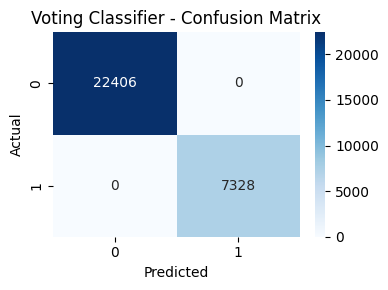

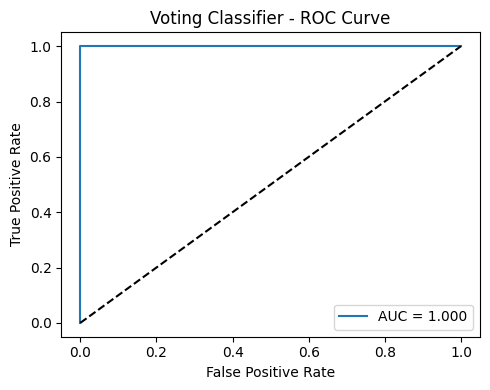

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: nan, Test ROC-AUC: 1.0000


In [ ]:
from sklearn.ensemble import VotingClassifier

def train_ensemble_model(X_train, y_train, X_test, y_test):
    model1 = LogisticRegression(max_iter=1000)
    model2 = DecisionTreeClassifier(random_state=42)
    model3 = RandomForestClassifier(n_estimators=100, random_state=42)

    ensemble = VotingClassifier(
        estimators=[('lr', model1), ('dt', model2), ('rf', model3)],
        voting='hard'
    )

    ensemble.fit(X_train, y_train)

    print("Voting Classifier")

    train_score = ensemble.score(X_train, y_train)
    test_score  = ensemble.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns

    y_pred = ensemble.predict(X_test).astype(int)

    try:
        y_prob = ensemble.predict_proba(X_test)[:, 1]
    except:
        y_prob = y_pred

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_prob)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Voting Classifier - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Voting Classifier - ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # TRAIN METRICS
    y_train_pred = ensemble.predict(X_train).astype(int)

    try:
        y_train_prob = ensemble.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Voting Classifier", test_score])

    evaluation_results.append([
        "Voting Classifier",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])

    roc_data["Voting Classifier"] = (fpr, tpr, roc_auc)
train_ensemble_model(X_train, y_train, X_test, y_test)


Stacking Classifier


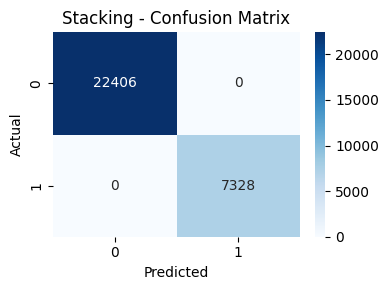

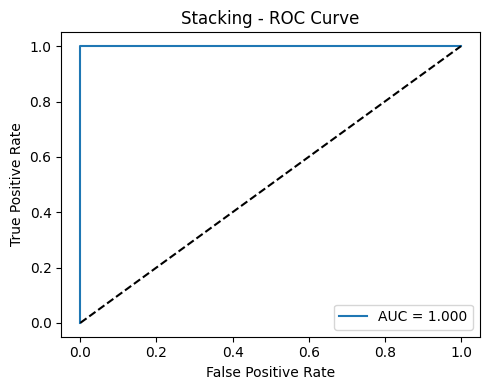

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def train_stacking_model(X_train, y_train, X_test, y_test):
    estimators = [
        ('lr', LogisticRegression(max_iter=1000)),
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]

    stacking = StackingClassifier(
        estimators=estimators,
        final_estimator=LogisticRegression(),
        cv=5,
        n_jobs=-1
    )

    stacking.fit(X_train, y_train)

    print("Stacking Classifier")

    train_score = stacking.score(X_train, y_train)
    test_score  = stacking.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns
    import numpy as np

    y_pred = stacking.predict(X_test)

    y_score = None
    if hasattr(stacking, "predict_proba"):
      y_score = stacking.predict_proba(X_test)[:, 1]
    elif hasattr(stacking, "decision_function"):
      y_score = stacking.decision_function(X_test)


    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_score) if y_score is not None else float('nan')

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Stacking - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if y_score is not None:
        try:
            fpr, tpr, _ = roc_curve(y_test, y_score)
            plt.figure(figsize=(5,4))
            plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
            plt.plot([0,1], [0,1], 'k--')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title("Stacking - ROC Curve")
            plt.legend()
            plt.tight_layout()
            plt.show()
            roc_data["Stacking Classifier"] = (fpr, tpr, roc_auc)
        except:
            roc_data["Stacking Classifier"] = (None, None, np.nan)
    else:
        roc_data["Stacking Classifier"] = (None, None, np.nan)

    # TRAIN METRICS
    y_train_pred = stacking.predict(X_train)

    try:
        y_train_prob = stacking.predict_proba(X_train)[:, 1]
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Stacking Classifier", test_score])

    evaluation_results.append([
        "Stacking Classifier",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_stacking_model(X_train, y_train, X_test, y_test)


In [ ]:
print("Does X_train contain Status?", "Status" in X_train.columns)


Does X_train contain Status? False


Bagging Classifier


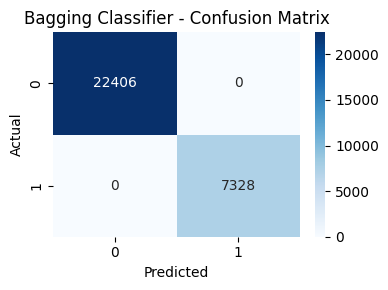

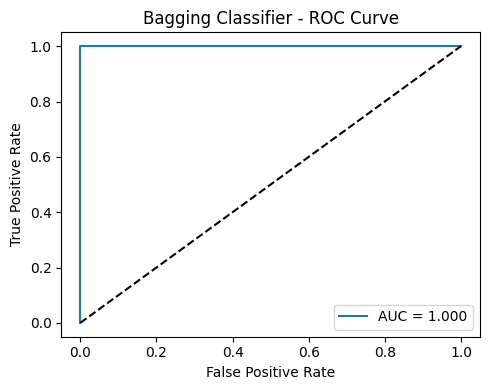

 Train Accuracy: 1.0000, Test Accuracy: 1.0000
 Train Precision: 1.0000, Test Precision: 1.0000
 Train Recall: 1.0000, Test Recall: 1.0000
 Train F1 Score: 1.0000, Test F1 Score: 1.0000
 Train ROC-AUC: 1.0000, Test ROC-AUC: 1.0000


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

def train_bagging_model(X_train, y_train, X_test, y_test):
    base_model = DecisionTreeClassifier(random_state=42)
    bagging = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
    bagging.fit(X_train, y_train)

    print("Bagging Classifier")

    train_score = bagging.score(X_train, y_train)
    test_score  = bagging.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns
    import numpy as np

    y_pred = bagging.predict(X_test)

    try:
        y_prob = bagging.predict_proba(X_test)[:, 1]
    except:
        y_prob = y_pred.astype(float)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_prob)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Bagging Classifier - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Bagging Classifier - ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    roc_data["Bagging Classifier"] = (fpr, tpr, roc_auc)

    # ==== TRAIN METRICS ====
    y_train_pred = bagging.predict(X_train)

    try:
        y_train_prob = bagging.predict_proba(X_train)[:, 1]
    except:
        y_train_prob = y_train_pred.astype(float)

    train_auc = roc_auc_score(y_train, y_train_prob)
    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Bagging Classifier", test_score])

    evaluation_results.append([
        "Bagging Classifier",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])
train_bagging_model(X_train, y_train, X_test, y_test)

MLP Classifier


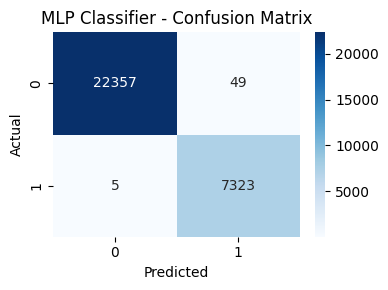

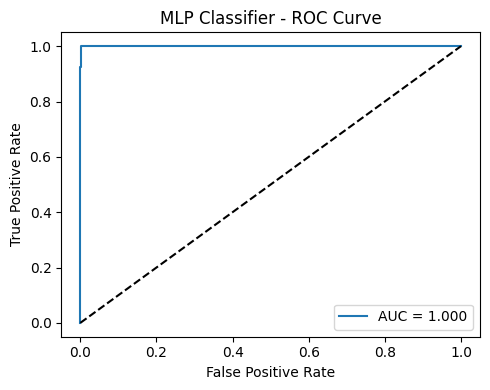

 Train Accuracy: 0.9993, Test Accuracy: 0.9982
 Train Precision: 0.9974, Test Precision: 0.9934
 Train Recall: 1.0000, Test Recall: 0.9993
 Train F1 Score: 0.9987, Test F1 Score: 0.9963
 Train ROC-AUC: 1.0000, Test ROC-AUC: 0.9999


In [ ]:
from sklearn.neural_network import MLPClassifier

def train_mlp(X_train, y_train, X_test, y_test):
    model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
    model.fit(X_train, y_train)

    print("MLP Classifier")

    train_score = model.score(X_train, y_train)
    test_score  = model.score(X_test, y_test)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns
    import numpy as np

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # FIXED

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_prob)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("MLP Classifier - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("MLP Classifier - ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    roc_data["MLP Classifier"] = (fpr, tpr, roc_auc)

    # ==== TRAIN METRICS ====
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1]
    train_auc    = roc_auc_score(y_train, y_train_prob)

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    print(f" Train Accuracy: {train_score:.4f}, Test Accuracy: {test_score:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["MLP Classifier", test_score])

    evaluation_results.append([
        "MLP Classifier",
        train_score, train_precision, train_recall, train_f1, train_auc,
        test_score, precision, recall, f1, roc_auc
    ])

train_mlp(X_train, y_train, X_test, y_test)


In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (118936, 48)
y_train shape: (118936,)
X_test shape: (29734, 48)
y_test shape: (29734,)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Simple ANN
930/930 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


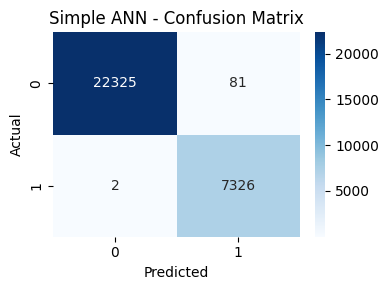

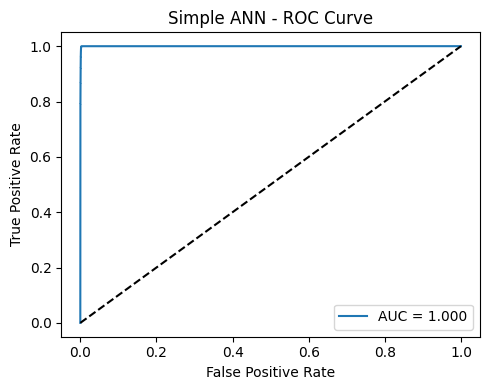

3717/3717 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
 Train Accuracy: 0.9979, Test Accuracy: 0.9972
 Train Precision: 0.9916, Test Precision: 0.9891
 Train Recall: 0.9998, Test Recall: 0.9997
 Train F1 Score: 0.9957, Test F1 Score: 0.9944
 Train ROC-AUC: 0.9999, Test ROC-AUC: 0.9998


In [27]:
import tensorflow as tf

def train_simple_nn(X_train, y_train, X_test, y_test):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

    print("Simple ANN")

    # Train/Test Accuracy
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss,  test_acc  = model.evaluate(X_test, y_test, verbose=0)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns
    import numpy as np

    # Test predictions
    y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Simple ANN - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Simple ANN - ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    roc_data["Simple ANN"] = (fpr, tpr, roc_auc)

    # ==== TRAIN METRICS ====
    y_train_prob = model.predict(X_train).ravel()
    y_train_pred = (y_train_prob >= 0.5).astype(int)

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    try:
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    print(f" Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall: {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score: {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC: {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Simple ANN", test_acc])

    evaluation_results.append([
        "Simple ANN",
        train_acc, train_precision, train_recall, train_f1, train_auc,
        test_acc, precision, recall, f1, roc_auc
    ])
train_simple_nn(X_train, y_train, X_test, y_test)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Simple ANN


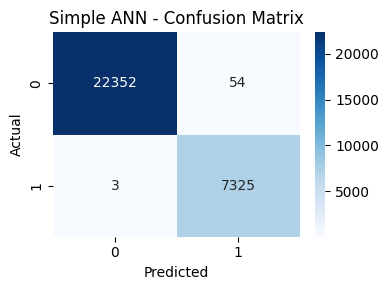

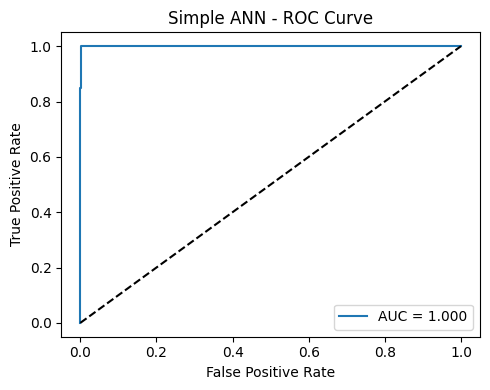

 Train Accuracy: 0.9984, Test Accuracy: 0.9981
 Train Precision: 0.9942, Test Precision: 0.9927
 Train Recall:    0.9994, Test Recall: 0.9996
 Train F1 Score:  0.9968, Test F1 Score: 0.9961
 Train ROC-AUC:   0.9999, Test ROC-AUC: 0.9998


In [28]:
import tensorflow as tf

def train_simple_nn(X_train, y_train, X_test, y_test):

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=0)

    print("Simple ANN")

    #  TRAIN/TEST ACCURACY
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_loss,  test_acc  = model.evaluate(X_test, y_test, verbose=0)

    from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
    import matplotlib.pyplot as plt, seaborn as sns
    import numpy as np

    #  TEST METRICS
    y_prob = model.predict(X_test, verbose=0).ravel()
    y_pred = (y_prob >= 0.5).astype(int)

    precision = precision_score(y_test, y_pred, zero_division=0)
    recall    = recall_score(y_test, y_pred, zero_division=0)
    f1        = f1_score(y_test, y_pred, zero_division=0)
    roc_auc   = roc_auc_score(y_test, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Simple ANN - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(5,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Simple ANN - ROC Curve")
    plt.legend()
    plt.tight_layout()
    plt.show()

    roc_data["Simple ANN"] = (fpr, tpr, roc_auc)

    #  TRAIN METRICS
    y_train_prob = model.predict(X_train, verbose=0).ravel()
    y_train_pred = (y_train_prob >= 0.5).astype(int)

    train_precision = precision_score(y_train, y_train_pred, zero_division=0)
    train_recall    = recall_score(y_train, y_train_pred, zero_division=0)
    train_f1        = f1_score(y_train, y_train_pred, zero_division=0)

    try:
        train_auc = roc_auc_score(y_train, y_train_prob)
    except:
        train_auc = float('nan')

    print(f" Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f" Train Precision: {train_precision:.4f}, Test Precision: {precision:.4f}")
    print(f" Train Recall:    {train_recall:.4f}, Test Recall: {recall:.4f}")
    print(f" Train F1 Score:  {train_f1:.4f}, Test F1 Score: {f1:.4f}")
    print(f" Train ROC-AUC:   {train_auc:.4f}, Test ROC-AUC: {roc_auc:.4f}")

    model_results.append(["Simple ANN", test_acc])

    evaluation_results.append([
        "Simple ANN",
        train_acc, train_precision, train_recall, train_f1, train_auc,
        test_acc, precision, recall, f1, roc_auc
    ])
train_simple_nn(X_train, y_train, X_test, y_test)

In [ ]:
import pandas as pd

columns = [
    "Model",
    "Train Accuracy", "Train Precision", "Train Recall", "Train F1 Score", "Train ROC-AUC",
    "Test Accuracy", "Test Precision", "Test Recall", "Test F1 Score", "Test ROC-AUC"
]

eval_df = pd.DataFrame(evaluation_results, columns=columns)

# Sort by highest test accuracy
eval_df = eval_df.sort_values(by="Test Accuracy", ascending=False)

display(eval_df.style.background_gradient(cmap='Blues'))


In [8]:
import pandas as pd

def extract_ui_metadata(df):
    print("\n==")
    print(" FULL FEATURE LIST")
    print("==")
    print(df.columns.tolist())

    print("\n==")
    print(" DATA TYPES")
    print("==")
    print(df.dtypes)

    print("\n==")
    print(" CATEGORICAL FEATURES + UNIQUE VALUES (LIMIT 20)")
    print("==")
    for col in df.select_dtypes(include=['object','category']).columns:
        print(f"\n▶ {col}:")
        print(df[col].unique()[:20])

    print("\n==")
    print(" NUMERIC FEATURES (min,max)")
    print("==")
    num_df = df.select_dtypes(include=['int64','float64'])
    print(num_df.describe().loc[['min','max']].T)

    print("\n==")
    print(" SAMPLE ROW (for auto-fill button)")
    print("==")
    print(df.iloc[0].to_dict())

# Run the function
extract_ui_metadata(df)



 FULL FEATURE LIST
['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'loan_amount', 'rate_of_interest', 'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'property_value', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status', 'dtir1']

 DATA TYPES
ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest         